In [177]:
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np


from tensorflow.keras.layers import LSTM

In [178]:
df_spectra=pd.read_csv("spectrum_energy_intensity2.csv",index_col=[0])
df_spectra.head(-50)

Energy  Intensity  k6a1  k6a2   k11   k12  k9a1  k9a2
0     0.874   0.019935  0.25  0.25  0.25  0.25  0.25  0.25
1     0.213   0.060488  0.25  0.25  0.25  0.25  0.25  0.50
2     0.866   0.020153  0.25  0.25  0.25  0.25  0.25  0.75
3     0.867   0.019641  0.25  0.25  0.25  0.25  0.50  0.25
4     0.220   0.060471  0.25  0.25  0.25  0.25  0.50  0.50
..      ...        ...   ...   ...   ...   ...   ...   ...
674   0.868   0.021991  0.75  0.75  0.25  0.75  0.75  0.75
675   0.865   0.021101  0.75  0.75  0.50  0.25  0.25  0.25
676   0.213   0.060723  0.75  0.75  0.50  0.25  0.25  0.50
677   0.868   0.019078  0.75  0.75  0.50  0.25  0.25  0.75
678   0.149   0.017403  0.75  0.75  0.50  0.25  0.50  0.25

[679 rows x 8 columns]

In [179]:
numpy_input=df_spectra[["k6a1","k6a2","k11","k12","k9a1","k9a2"]].to_numpy()
numpy_energy_intensity=df_spectra[["Energy","Intensity"]].to_numpy()


df_complete=pd.DataFrame(numpy_energy_intensity)
df_training=df_spectra.sample(frac=0.8,random_state=20)
df_testing=df_spectra.drop(df_training.index)

In [180]:
feature_columns_A = []

k6a1 = tf.feature_column.numeric_column("k6a1")
feature_columns_A.append(k6a1)

k6a2 = tf.feature_column.numeric_column("k6a2")
feature_columns_A.append(k6a2)

k11 = tf.feature_column.numeric_column("k11")
feature_columns_A.append(k11)

k12 = tf.feature_column.numeric_column("k12")
feature_columns_A.append(k12)

k9a1 = tf.feature_column.numeric_column("k9a1")
feature_columns_A.append(k9a1)

k9a2 = tf.feature_column.numeric_column("k9a2")
feature_columns_A.append(k9a2)

my_feature_layer_A = tf.keras.layers.DenseFeatures(feature_columns_A)


In [181]:
#define the plotting function.

def plot_the_loss_curve(epochs, mse,mse_test=0):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")

    plt.plot(epochs, mse, label="Loss")
    if(mse_test!=0):
        plt.plot(epochs,mse_test)
    plt.legend()
    plt.ylim([mse.min()*0.95, mse.max() * 1.03])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [203]:
def create_model(my_learning_rate, my_feature_layer,unit_layer_list=[10,12],regulations=0.04):
    """Create and compile a regression model."""
    model = tf.keras.models.Sequential()
    # Add the layer containing the feature columns to the model.
    model.add(my_feature_layer)

    # Describe the topography of the model by calling the tf.keras.layers.Dense
    # method once for each layer. We've specified the following arguments:
    #   * units specifies the number of nodes in this layer.
    #   * activation specifies the activation function (Rectified Linear Unit).
    #   * name is just a string that can be useful when debugging.

    # Define the first hidden layer with 10 nodes.   
    for n in unit_layer_list:
        print(n)
        model.add(tf.keras.layers.Dense(units=n, activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(regulations),name='Hidden'+str(n)))
                                  
  
   

    # Define the output layer.
    model.add(tf.keras.layers.Dense(units=1,  
                                    name='Output'))                              
  
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.MeanSquaredError()])
    return model



In [204]:
def train_model(model, dataset, epochs, label_name,
                batch_size=None):
    """Train the model by feeding it data."""

    # Split the dataset into features and label.
    features = {name:np.array(value) for name, value in dataset.items()}
    label = np.array(features.pop(label_name))
    history = model.fit(x=features, y=label, batch_size=batch_size,
                      epochs=epochs, shuffle=True) 

    # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
  
    # To track the progression of training, gather a snapshot
    # of the model's mean squared error at each epoch. 
    hist = pd.DataFrame(history.history)
    mse = hist["mean_squared_error"]

    return epochs, mse

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.0001
epochs_ini = 12000
batch_size = 700

# Specify the label
label_name = "Energy"

#try different things:
list_of_parameters=[[15,10,10],[10,10],[15,15,10,10]]
list_of_mse5=[]
for par in list_of_parameters:
    my_model = create_model(learning_rate, my_feature_layer_A,unit_layer_list=par,regulations=0.0)
    epochs, mse = train_model(my_model, df_training, epochs_ini, 
                          label_name, batch_size)
    list_of_mse5.append(my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)[0])
#epochs2, mse2 = train_model(my_model, df_training, 500, 
#                          label_name, batch_size)
#my_model.summary()
print(list_of_mse)

15
10
10
Epoch 1/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.8462 - mean_squared_error: 0.8462
Epoch 2/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.8413 - mean_squared_error: 0.8413
Epoch 3/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.8366 - mean_squared_error: 0.8366
Epoch 4/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.8318 - mean_squared_error: 0.8318
Epoch 5/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.8271 - mean_squared_error: 0.8271
Epoch 6/12000
1/1 [==============================] - 0s 0s/step - loss: 0.8223 - mean_squared_error: 0.8223
Epoch 7/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.8176 - mean_squared_error: 0.8176
Epoch 8/12000
1/1 [==============================] - 0s 0s/step - loss: 0.8130 - mean_squared_error: 0.8130
Epoch 9/12000
1/1 [==============================] - 0s 999us/step - loss: 0.8083 - mean_squared_error: 0.8083
Epoch 10/1

1/1 [==============================] - 0s 0s/step - loss: 0.5556 - mean_squared_error: 0.5556
Epoch 76/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5525 - mean_squared_error: 0.5525
Epoch 77/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5495 - mean_squared_error: 0.5495
Epoch 78/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5465 - mean_squared_error: 0.5465
Epoch 79/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5435 - mean_squared_error: 0.5435
Epoch 80/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5405 - mean_squared_error: 0.5405
Epoch 81/12000
1/1 [==============================] - 0s 0s/step - loss: 0.5375 - mean_squared_error: 0.5375
Epoch 82/12000
1/1 [==============================] - 0s 0s/step - loss: 0.5346 - mean_squared_error: 0.5346
Epoch 83/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5317 - mean_squared_error: 0.5317
Epoch 84/12000
1/1 [========

Epoch 149/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3745 - mean_squared_error: 0.3745
Epoch 150/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3726 - mean_squared_error: 0.3726
Epoch 151/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3707 - mean_squared_error: 0.3707
Epoch 152/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3688 - mean_squared_error: 0.3688
Epoch 153/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3669 - mean_squared_error: 0.3669
Epoch 154/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3650 - mean_squared_error: 0.3650
Epoch 155/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3632 - mean_squared_error: 0.3632
Epoch 156/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3613 - mean_squared_error: 0.3613
Epoch 157/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3595 - mean_squared_error: 0.3595
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.2619 - mean_squared_error: 0.2619
Epoch 223/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2607 - mean_squared_error: 0.2607
Epoch 224/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2595 - mean_squared_error: 0.2595
Epoch 225/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2583 - mean_squared_error: 0.2583
Epoch 226/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2571 - mean_squared_error: 0.2571
Epoch 227/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2560 - mean_squared_error: 0.2560
Epoch 228/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2548 - mean_squared_error: 0.2548
Epoch 229/12000
1/1 [==============================] - 0s 999us/step - loss: 0.2536 - mean_squared_error: 0.2536
Epoch 230/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2525 - mean_squared_error: 0.2525
Epoch 231/12000
1/

1/1 [==============================] - 0s 0s/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 296/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 297/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1924 - mean_squared_error: 0.1924
Epoch 298/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1918 - mean_squared_error: 0.1918
Epoch 299/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1911 - mean_squared_error: 0.1911
Epoch 300/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1904 - mean_squared_error: 0.1904
Epoch 301/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1898 - mean_squared_error: 0.1898
Epoch 302/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1891 - mean_squared_error: 0.1891
Epoch 303/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1885 - mean_squared_error: 0.1885
Epoch 304/120

1/1 [==============================] - 0s 0s/step - loss: 0.1553 - mean_squared_error: 0.1553
Epoch 369/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1550 - mean_squared_error: 0.1550
Epoch 370/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1546 - mean_squared_error: 0.1546
Epoch 371/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1542 - mean_squared_error: 0.1542
Epoch 372/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1538 - mean_squared_error: 0.1538
Epoch 373/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1534 - mean_squared_error: 0.1534
Epoch 374/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1531 - mean_squared_error: 0.1531
Epoch 375/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1527 - mean_squared_error: 0.1527
Epoch 376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1523 - mean_squared_error: 0.1523
Epoch 377/12000
1

1/1 [==============================] - 0s 0s/step - loss: 0.1340 - mean_squared_error: 0.1340
Epoch 442/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1338 - mean_squared_error: 0.1338
Epoch 443/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1336 - mean_squared_error: 0.1336
Epoch 444/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1334 - mean_squared_error: 0.1334
Epoch 445/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1332 - mean_squared_error: 0.1332
Epoch 446/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1330 - mean_squared_error: 0.1330
Epoch 447/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1328 - mean_squared_error: 0.1328
Epoch 448/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1326 - mean_squared_error: 0.1326
Epoch 449/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1324 - mean_squared_error: 0.1324
Epoch 450/1200

1/1 [==============================] - 0s 1ms/step - loss: 0.1226 - mean_squared_error: 0.1226
Epoch 515/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 516/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1224 - mean_squared_error: 0.1224
Epoch 517/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 518/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1222 - mean_squared_error: 0.1222
Epoch 519/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1221 - mean_squared_error: 0.1221
Epoch 520/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1220 - mean_squared_error: 0.1220
Epoch 521/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1219 - mean_squared_error: 0.1219
Epoch 522/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1218 - mean_squared_error: 0.1218
Epoch 5

1/1 [==============================] - 0s 999us/step - loss: 0.1172 - mean_squared_error: 0.1172
Epoch 588/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1172 - mean_squared_error: 0.1172
Epoch 589/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 590/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1171 - mean_squared_error: 0.1171
Epoch 591/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 592/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 593/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 594/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 595/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1168 - mean_squared_error: 0.1168
Epoch 596/12000
1/

1/1 [==============================] - 0s 1ms/step - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 661/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 662/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 663/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1148 - mean_squared_error: 0.1148
Epoch 664/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 665/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 666/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 667/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 668/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1147 - mean_squared_error: 0.1147
Epoch 669/1200

1/1 [==============================] - 0s 1ms/step - loss: 0.1137 - mean_squared_error: 0.1137
Epoch 734/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1137 - mean_squared_error: 0.1137
Epoch 735/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1137 - mean_squared_error: 0.1137
Epoch 736/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 737/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 738/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 739/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 740/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 741/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 742/1200

1/1 [==============================] - 0s 1ms/step - loss: 0.1130 - mean_squared_error: 0.1130
Epoch 807/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 808/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 809/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 810/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 811/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 812/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 813/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 814/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1129 - mean_squared_error: 0.1129
Epoch 815/12000

1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 880/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 881/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 882/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 883/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 884/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 885/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 886/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 887/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 888/1200

1/1 [==============================] - 0s 0s/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 953/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 954/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 955/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 956/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 957/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 958/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 959/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1118 - mean_squared_error: 0.1118
Epoch 960/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1117 - mean_squared_error: 0.1117
Epoch 961/12000


1/1 [==============================] - 0s 1000us/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1026/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1027/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1028/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1029/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1030/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1031/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1032/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1113 - mean_squared_error: 0.1113
Epoch 1033/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1113 - mean_squared_error: 0.1113
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1099/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1100/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1101/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1102/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1103/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1104/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1105/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1108 - mean_squared_error: 0.1108
Epoch 1106/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1108 - mean_squared_error: 0.1108

1/1 [==============================] - 0s 0s/step - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 1172/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 1173/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1104 - mean_squared_error: 0.1104
Epoch 1174/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 1175/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 1176/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 1177/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 1178/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 1179/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 11

1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1245/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1246/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1247/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1248/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1249/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1250/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1251/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 1252/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1098
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1318/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1319/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1320/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1321/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1322/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1323/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1324/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1325/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1094 - mean_squared_error: 0.1094
Epoch 1

1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1391/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1392/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1393/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1394/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1395/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1396/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1397/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1398/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 1399/120

1/1 [==============================] - 0s 1ms/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1464/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1465/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1466/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1467/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1468/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1469/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1470/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 1471/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1086 - mean_squared_error: 0.1086
Epoch 147

1/1 [==============================] - 0s 0s/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1537/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1538/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1539/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1540/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1541/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1542/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1543/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1544/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 1610/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 1611/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1612/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1613/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1614/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1615/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1616/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1617/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1078
Epoch 1618/1200

1/1 [==============================] - 0s 0s/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1683/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1684/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1685/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1686/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1687/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1688/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1689/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1690/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1074
Epoch 1691

1/1 [==============================] - 0s 999us/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1756/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1757/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1758/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1759/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1760/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1761/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1762/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 1763/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1069 - mean_squared_error: 0.1069
Epoch 1764/

Epoch 1828/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1829/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1830/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1831/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1832/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1833/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1834/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1835/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1065 - mean_squared_error: 0.1065
Epoch 1836/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_squared_er

1/1 [==============================] - 0s 1000us/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1901/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1902/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1903/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1904/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1905/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1906/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1907/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 1908/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epo

1/1 [==============================] - 0s 1000us/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1974/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1975/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1976/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1977/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1978/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1979/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1980/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch 1981/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1054 - mean_squared_error: 0.1054
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2047/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2048/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2049/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2050/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2051/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2052/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2053/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 2054/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 2120/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 2121/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 2122/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 2123/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 2124/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 2125/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 2126/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 2127/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 212

1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 2193/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 2194/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 2195/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 2196/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 2197/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 2198/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 2199/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 2200/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1030 - mean_squared_error: 0.1030
Epoch 2201/

1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 2266/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 2267/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 2268/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 2269/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 2270/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 2271/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 2272/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 2273/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 227

1/1 [==============================] - 0s 0s/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 2339/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 2340/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 2341/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 2342/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 2343/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 2344/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 2345/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 2346/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epo

1/1 [==============================] - 0s 1000us/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 2412/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 2413/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 2414/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 2415/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 2416/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 2417/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 2418/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 2419/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoc

1/1 [==============================] - 0s 1000us/step - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 2485/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 2486/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 2487/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 2488/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 2489/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 2490/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 2491/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 2492/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 2558/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 2559/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 2560/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 2561/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 2562/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 2563/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 2564/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 2565/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0978 - mean_squared_error: 0.0978
Epoch 2566

1/1 [==============================] - 0s 0s/step - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 2631/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 2632/12000
1/1 [==============================] - 0s 990us/step - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 2633/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 2634/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 2635/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0970 - mean_squared_error: 0.0970
Epoch 2636/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0969 - mean_squared_error: 0.0969
Epoch 2637/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0969 - mean_squared_error: 0.0969
Epoch 2638/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0969 - mean_squared_error: 0.0969
Epoch 2639/

1/1 [==============================] - 0s 1ms/step - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 2704/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 2705/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 2706/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 2707/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0962 - mean_squared_error: 0.0962
Epoch 2708/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 2709/12000
1/1 [==============================] - 0s 994us/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 2710/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 2711/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 2777/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 2778/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 2779/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 2780/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 2781/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 2782/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 2783/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 2784/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 278

1/1 [==============================] - 0s 1ms/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 2850/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2851/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2852/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2853/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2854/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2855/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2856/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2857/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0947 - mean_squared_error: 0.0947
Epoch 2

1/1 [==============================] - 0s 1ms/step - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 2923/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0941 - mean_squared_error: 0.0941
Epoch 2924/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 2925/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 2926/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 2927/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 2928/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 2929/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0940 - mean_squared_error: 0.0940
Epoch 2930/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0940 - mean_squared_error: 0.0940
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 2996/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 2997/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0934 - mean_squared_error: 0.0934
Epoch 2998/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 2999/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 3000/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 3001/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 3002/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 3003/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3069/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3070/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3071/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3072/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3073/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3074/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3075/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0927
Epoch 3076/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0926 - mean_squared_error: 0.0926
Epoch 307

1/1 [==============================] - 0s 1000us/step - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 3142/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 3143/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 3144/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 3145/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0921 - mean_squared_error: 0.0921
Epoch 3146/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 3147/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 3148/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 3149/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0920 - mean_squared_error: 0.0920
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 3215/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 3216/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 3217/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 3218/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 3219/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 3220/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 3221/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 3222/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0913 - mean_squared_error: 0.0913
Epoch 3223

1/1 [==============================] - 0s 0s/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 3288/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3289/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3290/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3291/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3292/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3293/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3294/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0907 - mean_squared_error: 0.0907
Epoch 3295/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0907 - mean_squared_error: 0.0907
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3361/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3362/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3363/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3364/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3365/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3366/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 3367/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 3368/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0900 - mean_squared_error: 0.0900
Epoch 

Epoch 3433/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 3434/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 3435/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 3436/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 3437/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 3438/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 3439/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 3440/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 3441/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0894 - mean_squared_e

1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3507/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3508/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3509/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3510/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3511/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3512/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3513/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 3514/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3580/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3581/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3582/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3583/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3584/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3585/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3586/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 3587/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 358

1/1 [==============================] - 0s 1ms/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3653/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3654/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3655/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3656/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3657/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3658/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0874 - mean_squared_error: 0.0874
Epoch 3659/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 3660/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0873 - mean_squared_error: 0.0873
Epoc

1/1 [==============================] - 0s 1000us/step - loss: 0.0867 - mean_squared_error: 0.0867
Epoch 3726/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3727/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3728/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3729/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3730/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3731/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3732/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0866 - mean_squared_error: 0.0866
Epoch 3733/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0866 - mean_squared_error: 0.0866

Epoch 3798/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3799/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3800/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3801/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3802/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3803/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3804/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 3805/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 3806/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0858 - mean_squared_error: 0.0

1/1 [==============================] - 0s 0s/step - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 3872/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 3873/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 3874/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 3875/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 3876/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 3877/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 3878/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch 3879/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0851 - mean_squared_error: 0.0851
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 3945/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 3946/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 3947/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 3948/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0844 - mean_squared_error: 0.0844
Epoch 3949/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 3950/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 3951/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 3952/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 3953

1/1 [==============================] - 0s 1ms/step - loss: 0.0837 - mean_squared_error: 0.0837
Epoch 4017/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4018/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4019/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4020/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4021/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4022/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4023/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4024/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0836 - mean_squared_error: 0.0836
Epoch 4025/

1/1 [==============================] - 0s 0s/step - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 4090/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 4091/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 4092/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 4093/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0829 - mean_squared_error: 0.0829
Epoch 4094/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 4095/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 4096/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 4097/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 409

1/1 [==============================] - 0s 999us/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4163/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4164/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4165/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4166/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4167/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4168/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4169/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0821 - mean_squared_error: 0.0821
Epoch 4170/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0821 - mean_squared_error: 0.0821
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 4236/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 4237/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 4238/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 4239/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 4240/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 4241/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 4242/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 4243/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0813
Epoch 42

Epoch 4308/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 4309/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 4310/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0806 - mean_squared_error: 0.0806
Epoch 4311/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 4312/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 4313/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 4314/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 4315/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 4316/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0805 - mean_squared_error:

Epoch 4381/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0798 - mean_squared_error: 0.0798
Epoch 4382/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4383/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4384/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4385/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4386/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4387/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4388/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0797 - mean_squared_error: 0.0797
Epoch 4389/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0797 - mean_square

1/1 [==============================] - 0s 999us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4455/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4456/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4457/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4458/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4459/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4460/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 4461/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0788 - mean_squared_error: 0.0788
Epoch 4462/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0788 - mean_squared_error: 0.0788
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 4527/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 4528/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 4529/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 4530/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 4531/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 4532/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 4533/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 4534/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 453

1/1 [==============================] - 0s 1ms/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 4600/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4601/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4602/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4603/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4604/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4605/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4606/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4607/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0772 - mean_squared_error: 0.0772
Epoch 4608/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 4673/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 4674/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 4675/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 4676/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0764 - mean_squared_error: 0.0764
Epoch 4677/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 4678/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 4679/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 4680/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0763 - mean_squared_error: 0.0763
Epoch 4681

1/1 [==============================] - 0s 1ms/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4746/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4747/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4748/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4749/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4750/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4751/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4752/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0755 - mean_squared_error: 0.0755
Epoch 4753/12000
1/1 [==============================] - 0s 2ms/step - loss: 0.0755 - mean_squared_error: 0.0755
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4819/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4820/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4821/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4822/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4823/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4824/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4825/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 4826/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 4891/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0740 - mean_squared_error: 0.0740
Epoch 4892/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 4893/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 4894/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 4895/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 4896/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 4897/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 4898/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0739 - mean_squared_error: 0.0739
Epoch 48

1/1 [==============================] - 0s 999us/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 4964/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 4965/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 4966/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 4967/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 4968/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0732 - mean_squared_error: 0.0732
Epoch 4969/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 4970/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 4971/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0731 - mean_squared_error: 0.0731
Epoch 497

1/1 [==============================] - 0s 1ms/step - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 5037/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0725 - mean_squared_error: 0.0725
Epoch 5038/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5039/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5040/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5041/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5042/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5043/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 5044/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0724 - mean_squared_error: 0.0724
Epoch 50

1/1 [==============================] - 0s 0s/step - loss: 0.0718 - mean_squared_error: 0.0718
Epoch 5110/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5111/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5112/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5113/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5114/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5115/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5116/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5117/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0717 - mean_squared_error: 0.0717
Epoch 5118

1/1 [==============================] - 0s 999us/step - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 5183/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 5184/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 5185/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 5186/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0711 - mean_squared_error: 0.0711
Epoch 5187/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 5188/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 5189/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 5190/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 5191/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 5256/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 5257/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 5258/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0705 - mean_squared_error: 0.0705
Epoch 5259/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 5260/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 5261/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 5262/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 5263/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0704 - mean_squared_error: 0.0704
Epoch 5

1/1 [==============================] - 0s 0s/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5329/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5330/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5331/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5332/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5333/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5334/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5335/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0699 - mean_squared_error: 0.0699
Epoch 5336/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0698 - mean_squared_error: 0.0698


1/1 [==============================] - 0s 0s/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 5401/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 5402/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 5403/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 5404/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 5405/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 5406/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 5407/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 5408/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 5409

1/1 [==============================] - 0s 1000us/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5474/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5475/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5476/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5477/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5478/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5479/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5480/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0689 - mean_squared_error: 0.0689
Epoch 5481/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0688 - mean_squared_error: 0.0688
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0685 - mean_squared_error: 0.0685
Epoch 5547/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5548/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5549/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5550/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5551/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5552/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5553/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 5554/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0684 - mean_squared_error: 0.0684
Epoch 55

1/1 [==============================] - 0s 1ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5620/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5621/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5622/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5623/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5624/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5625/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5626/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 5627/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0680 - mean_squared_error: 0.0680
Epoch 562

1/1 [==============================] - 0s 1000us/step - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 5693/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 5694/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 5695/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 5696/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0677 - mean_squared_error: 0.0677
Epoch 5697/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 5698/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 5699/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0676 - mean_squared_error: 0.0676
Epoch 5700/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0676 - mean_squared_error: 0.0676
E

Epoch 5765/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5766/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5767/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5768/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5769/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5770/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5771/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5772/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0673 - mean_squared_error: 0.0673
Epoch 5773/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0673 - mean_squared_err

Epoch 5838/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5839/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5840/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5841/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5842/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5843/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5844/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5845/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0670 - mean_squared_error: 0.0670
Epoch 5846/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0670 - mean_squared_

Epoch 5911/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5912/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5913/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5914/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5915/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5916/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5917/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5918/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0667 - mean_squared_error: 0.0667
Epoch 5919/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0667 - mean_squared_error

1/1 [==============================] - 0s 1000us/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5985/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5986/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5987/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5988/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5989/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5990/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 5991/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 5992/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6058/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6059/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6060/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6061/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6062/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6063/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6064/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 6065/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 606

1/1 [==============================] - 0s 0s/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6131/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6132/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6133/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6134/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6135/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6136/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6137/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 6138/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0660 - mean_squared_error: 0.0660
Epoch 613

Epoch 6203/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6204/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6205/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6206/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6207/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6208/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6209/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6210/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0658 - mean_squared_error: 0.0658
Epoch 6211/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0658 - mean_squared_err

1/1 [==============================] - 0s 1000us/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6276/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6277/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6278/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6279/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6280/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6281/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6282/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0656 - mean_squared_error: 0.0656
Epoch 6283/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0656 - mean_squared_error: 0.0656

1/1 [==============================] - 0s 1000us/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 6349/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 6350/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 6351/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 6352/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0655 - mean_squared_error: 0.0655
Epoch 6353/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 6354/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 6355/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 6356/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0654 - mean_squared_error: 0.0654
Epoch 6

1/1 [==============================] - 0s 1ms/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6422/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6423/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6424/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6425/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6426/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6427/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6428/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 6429/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0653 - mean_squared_error: 0.0653
Epoch 643

1/1 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6495/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6496/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6497/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6498/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6499/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6500/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6501/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6502/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0652
Epoch 6

1/1 [==============================] - 0s 0s/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6568/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6569/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6570/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6571/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6572/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6573/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6574/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 6575/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0650 - mean_squared_error: 0.0650
Epoch 657

1/1 [==============================] - 0s 1000us/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6641/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6642/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6643/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6644/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6645/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6646/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6647/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch 6648/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0649 - mean_squared_error: 0.0649
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6714/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6715/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6716/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6717/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6718/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6719/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6720/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 6721/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0648 - mean_squared_error: 0.0648
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6787/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6788/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6789/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6790/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6791/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6792/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6793/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 6794/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - mean_squared_error: 0.0647
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6860/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6861/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6862/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6863/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6864/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6865/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6866/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 6867/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0645 - mean_squared_error: 0.0645
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6932/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6933/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6934/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6935/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6936/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6937/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6938/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6939/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0644 - mean_squared_error: 0.0644
Epoch 6

1/1 [==============================] - 0s 1000us/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7005/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7006/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7007/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7008/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7009/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7010/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7011/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 7012/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0643 - mean_squared_error: 0.0643
Epoch 70

1/1 [==============================] - 0s 1ms/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7078/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7079/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7080/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7081/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7082/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7083/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7084/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7085/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0641 - mean_squared_error: 0.0641
Epoch 7086/

1/1 [==============================] - 0s 0s/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7151/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7152/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7153/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7154/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7155/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7156/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7157/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7158/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0640 - mean_squared_error: 0.0640
Epoch 7

1/1 [==============================] - 0s 1000us/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7224/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7225/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7226/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7227/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7228/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7229/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7230/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0639 - mean_squared_error: 0.0639
Epoch 7231/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0639 - mean_squared_error: 0.0639


1/1 [==============================] - 0s 1ms/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7297/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7298/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7299/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7300/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7301/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7302/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7303/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 7304/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0637 - mean_squared_error: 0.0637
Epo

1/1 [==============================] - 0s 1000us/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7370/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7371/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7372/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7373/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7374/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7375/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7377/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 7

1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7443/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7444/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7445/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7446/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7447/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7448/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7449/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7450/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 7451/1

1/1 [==============================] - 0s 0s/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7516/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7517/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7518/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7519/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7520/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7521/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7522/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7523/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0632 - mean_squared_error: 0.0632
Epoch 7524/

1/1 [==============================] - 0s 1ms/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7589/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7590/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7591/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7592/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7593/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7594/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7595/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0629 - mean_squared_error: 0.0629
Epoch 7596/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0629 - mean_squared_error: 0.0629


1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7662/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7663/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7664/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7665/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7666/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7667/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0626
Epoch 7668/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 7669/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0625 - mean_squared_error: 0.0625
Epoch 767

1/1 [==============================] - 0s 0s/step - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 7735/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 7736/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 7737/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 7738/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 7739/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0621 - mean_squared_error: 0.0621
Epoch 7740/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 7741/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0620 - mean_squared_error: 0.0620
Epoch 7742/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0620 - mean_squared_error: 0.0620
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 7808/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 7809/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 7810/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 7811/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 7812/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0617 - mean_squared_error: 0.0617
Epoch 7813/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 7814/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0616 - mean_squared_error: 0.0616
Epoch 7815/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0616 - mean_squared_error: 0.0616
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7881/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7882/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7883/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7884/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7885/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7886/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7887/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7888/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0612 - mean_squared_error: 0.0612
Epoch 7889/12

1/1 [==============================] - 0s 0s/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7954/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7955/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7956/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7957/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7958/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7959/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7960/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7961/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 7962/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8027/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8028/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8029/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8030/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8031/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8032/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8033/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch 8034/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0604 - mean_squared_error: 0.0604
Epoch

1/1 [==============================] - 0s 1000us/step - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 8100/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 8101/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0601 - mean_squared_error: 0.0601
Epoch 8102/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 8103/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 8104/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 8105/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 8106/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.0600
Epoch 8107/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.06

1/1 [==============================] - 0s 0s/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8172/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8173/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8174/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8175/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8176/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8177/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8178/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0597
Epoch 8179/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0596 - mean_squared_error: 0.0596
Epoc

1/1 [==============================] - 0s 1000us/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8244/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8245/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8246/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8247/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8248/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8249/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8250/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 8251/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0593 - mean_squared_error: 0.0593
E

1/1 [==============================] - 0s 0s/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8317/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8318/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8319/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8320/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8321/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8322/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8323/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8324/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0589 - mean_squared_error: 0.0589
Epoch 8325/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 8390/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 8391/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 8392/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 8393/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 8394/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0585 - mean_squared_error: 0.0585
Epoch 8395/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 8396/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0584 - mean_squared_error: 0.0584
Epoch 8397/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0584 - mean_squared_error: 0.0584
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0581 - mean_squared_error: 0.0581
Epoch 8462/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8463/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8464/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8465/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8466/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8467/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8468/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 8469/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0580 - mean_squared_error: 0.0580
Epo

Epoch 8534/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8535/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8536/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8537/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8538/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8539/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8540/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8541/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0576
Epoch 8542/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_erro

1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8608/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8609/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8610/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8611/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8612/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8613/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8614/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8615/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0572 - mean_squared_error: 0.0572
Epoch 8

1/1 [==============================] - 0s 1ms/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8681/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8682/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8683/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8684/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8685/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8686/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8687/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8688/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0567 - mean_squared_error: 0.0567
Epoch 8689

1/1 [==============================] - 0s 0s/step - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 8754/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 8755/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 8756/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 8757/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0561 - mean_squared_error: 0.0561
Epoch 8758/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 8759/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 8760/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 8761/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0560 - mean_squared_error: 0.0560
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 8827/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8828/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8829/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8830/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8831/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8832/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8833/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 8834/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0551 - mean_squared_error: 0.0551


1/1 [==============================] - 0s 1ms/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8900/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8901/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8902/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8903/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8904/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8905/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8906/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8907/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0543 - mean_squared_error: 0.0543
Epoch 8908/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 8973/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 8974/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 8975/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 8976/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 8977/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0535 - mean_squared_error: 0.0535
Epoch 8978/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 8979/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0534 - mean_squared_error: 0.0534
Epoch 8980/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0534 - mean_squared_error: 0.0534
Epoc

1/1 [==============================] - 0s 1000us/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9046/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9047/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9048/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9049/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9050/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9051/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 9052/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 9053/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0526
Epoch 9

1/1 [==============================] - 0s 0s/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9119/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9120/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9121/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9122/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9123/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9124/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9125/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoch 9126/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0519 - mean_squared_error: 0.0519
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 9192/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 9193/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0512 - mean_squared_error: 0.0512
Epoch 9194/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 9195/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 9196/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 9197/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 9198/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 9199/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0511
Epoch 920

1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 9265/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 9266/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 9267/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 9268/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 9269/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 9270/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 9271/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0504 - mean_squared_error: 0.0504
Epoch 9272/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0504 - mean_squared_error: 0.0

1/1 [==============================] - 0s 0s/step - loss: 0.0498 - mean_squared_error: 0.0498
Epoch 9338/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9339/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9340/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9341/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9342/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9343/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9344/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 9345/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0497 - mean_squared_error: 0.0497
Epoch 934

1/1 [==============================] - 0s 1ms/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9411/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9412/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9413/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9414/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9415/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9416/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9417/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0490 - mean_squared_error: 0.0490
Epoch 9418/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0489 - mean_squared_error: 0.0489
Epoch 9419

1/1 [==============================] - 0s 1000us/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 9484/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9485/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9486/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9487/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9488/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9489/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9490/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 9491/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0482 - mean_squared_error: 0.0482
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 9557/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_squared_error: 0.0475
Epoch 9558/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 9559/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 9560/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 9561/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 9562/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 9563/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 9564/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0474 - mean_squared_error: 0.0474
Epoch 956

1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9630/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9631/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9632/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9633/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9634/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9635/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9636/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0467
Epoch 9637/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0466 - mean_squared_error: 0.0466
Epoch 9638

1/1 [==============================] - 0s 1ms/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 9703/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 9704/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 9705/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 9706/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 9707/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 9708/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 9709/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 9710/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9776/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9777/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9778/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9779/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9780/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9781/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0452 - mean_squared_error: 0.0452
Epoch 9782/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 9783/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0451 - mean_squared_error: 0.0451
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 9849/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 9850/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 9851/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 9852/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 9853/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0444 - mean_squared_error: 0.0444
Epoch 9854/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 9855/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0443
Epoch 9856/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.044

1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 9921/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 9922/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 9923/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 9924/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0434 - mean_squared_error: 0.0434
Epoch 9925/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 9926/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 9927/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0433 - mean_squared_error: 0.0433
Epoch 9928/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0433 - mean_squared_error: 0.0433
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 9993/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 9994/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0423
Epoch 9995/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 9996/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 9997/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 9998/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 9999/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0422 - mean_squared_error: 0.0422
Epoch 10000/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0422 - mean_squared_error: 0.0422
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 10065/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 10066/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 10067/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 10068/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 10069/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0416 - mean_squared_error: 0.0416
Epoch 10070/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 10071/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 10072/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0415 - mean_squared_error: 0.0

1/1 [==============================] - 0s 0s/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 10137/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 10138/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 10139/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 10140/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 10141/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0411 - mean_squared_error: 0.0411
Epoch 10142/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 10143/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0410
Epoch 10144/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_squared_error: 0.041

1/1 [==============================] - 0s 1000us/step - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 10209/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 10210/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0404 - mean_squared_error: 0.0404
Epoch 10211/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 10212/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 10213/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 10214/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 10215/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0403 - mean_squared_error: 0.0403
Epoch 10216/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0402 - mean_squared_error:

1/1 [==============================] - 0s 1ms/step - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 10281/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0395 - mean_squared_error: 0.0395
Epoch 10282/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 10283/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 10284/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 10285/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 10286/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 10287/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0394 - mean_squared_error: 0.0394
Epoch 10288/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mean_squared_error: 0.0394

1/1 [==============================] - 0s 1000us/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10353/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10354/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10355/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10356/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10357/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10358/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 10359/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 10360/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0389 - mean_squared_error: 0.

1/1 [==============================] - 0s 0s/step - loss: 0.0386 - mean_squared_error: 0.0386
Epoch 10425/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10426/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10427/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10428/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10429/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10430/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10431/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0385 - mean_squared_error: 0.0385
Epoch 10432/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0385 - mean_squared_error: 0.0385
E

1/1 [==============================] - 0s 999us/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10497/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10498/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10499/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10500/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10501/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10502/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0382 - mean_squared_error: 0.0382
Epoch 10503/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0381 - mean_squared_error: 0.0381
Epoch 10504/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0381 - mean_squared_error: 0.0381
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10569/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10570/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10571/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10572/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10573/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10574/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10575/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0378 - mean_squared_error: 0.0378
Epoch 10576/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0378 - mean_squared_error: 0.0378

1/1 [==============================] - 0s 1000us/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10641/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10642/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10643/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10644/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10645/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10646/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10647/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0374
Epoch 10648/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0374 - mean_squared_error: 0.0374
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 10713/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 10714/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 10715/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 10716/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 10717/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 10718/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 10719/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 10720/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368
E

1/1 [==============================] - 0s 0s/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10785/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10786/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10787/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10788/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10789/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10790/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 10791/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 10792/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0360 - mean_squared_error: 0.0

1/1 [==============================] - 0s 0s/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10857/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10858/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10859/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10860/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10861/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10862/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10863/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 10864/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0354 - mean_squared_error: 0.0354
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 10929/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 10930/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 10931/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0350 - mean_squared_error: 0.0350
Epoch 10932/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 10933/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 10934/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 10935/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 10936/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0349 - mean_squared_error: 0.034

1/1 [==============================] - 0s 1ms/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 11001/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 11002/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 11003/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 11004/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 11005/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0346 - mean_squared_error: 0.0346
Epoch 11006/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 11007/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0345 - mean_squared_error: 0.0345
Epoch 11008/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0345 - mean_squared_error: 0.

1/1 [==============================] - 0s 0s/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11073/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11074/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11075/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11076/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11077/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11078/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11079/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0342 - mean_squared_error: 0.0342
Epoch 11080/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0342


1/1 [==============================] - 0s 1000us/step - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 11145/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 11146/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0340 - mean_squared_error: 0.0340
Epoch 11147/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 11148/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 11149/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 11150/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 11151/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0339 - mean_squared_error: 0.0339
Epoch 11152/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0339 - mean_squared_error: 0.03

1/1 [==============================] - 0s 0s/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11217/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11218/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11219/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11220/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11221/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11222/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11223/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoch 11224/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0337
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11289/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11290/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11291/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11292/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11293/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11294/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11295/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0334 - mean_squared_error: 0.0334
Epoch 11296/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0334 - mean_squared_error: 0.0

1/1 [==============================] - 0s 1ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11361/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11362/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11363/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11364/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11365/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11366/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11367/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0332 - mean_squared_error: 0.0332
Epoch 11368/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0332 - mean_squared_error: 0.033

1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11433/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11434/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11435/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11436/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11437/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11438/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11439/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 11440/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0329 - mean_squared_error: 0.03

1/1 [==============================] - 0s 0s/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 11505/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 11506/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 11507/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 11508/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 11509/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 11510/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 11511/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0326 - mean_squared_error: 0.0326
Epoch 11512/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0326 - mean_squared_error: 0.0326
Ep

1/1 [==============================] - 0s 999us/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11577/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11578/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11579/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11580/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11581/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11582/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11583/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0324 - mean_squared_error: 0.0324
Epoch 11584/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0324 - mean_squared_error: 0.0

1/1 [==============================] - 0s 1ms/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11649/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11650/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11651/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11652/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11653/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11654/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11655/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0321 - mean_squared_error: 0.0321
Epoch 11656/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0321 - mean_squared_error: 0.0

1/1 [==============================] - 0s 0s/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11721/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11722/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11723/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11724/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11725/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11726/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11727/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0318 - mean_squared_error: 0.0318
Epoch 11728/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0318 - mean_squared_error: 0.0318
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 11793/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 11794/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 11795/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0316 - mean_squared_error: 0.0316
Epoch 11796/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 11797/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 11798/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 11799/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0315
Epoch 11800/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0315


1/1 [==============================] - 0s 0s/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11865/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11866/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11867/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11868/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11869/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11870/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11871/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0313 - mean_squared_error: 0.0313
Epoch 11872/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0312 - mean_squared_error: 0.

1/1 [==============================] - 0s 1ms/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 11937/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 11938/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 11939/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 11940/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 11941/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 11942/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 11943/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 11944/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0309 - mean_squared_error: 0.03

1/1 [==============================] - 0s 1ms/step - loss: 3.0515 - mean_squared_error: 3.0515
Epoch 8/12000
1/1 [==============================] - 0s 1ms/step - loss: 3.0416 - mean_squared_error: 3.0416
Epoch 9/12000
1/1 [==============================] - 0s 1000us/step - loss: 3.0317 - mean_squared_error: 3.0317
Epoch 10/12000
1/1 [==============================] - 0s 1ms/step - loss: 3.0218 - mean_squared_error: 3.0218
Epoch 11/12000
1/1 [==============================] - 0s 1ms/step - loss: 3.0120 - mean_squared_error: 3.0120
Epoch 12/12000
1/1 [==============================] - 0s 1ms/step - loss: 3.0022 - mean_squared_error: 3.0022
Epoch 13/12000
1/1 [==============================] - 0s 1ms/step - loss: 2.9924 - mean_squared_error: 2.9924
Epoch 14/12000
1/1 [==============================] - 0s 0s/step - loss: 2.9826 - mean_squared_error: 2.9826
Epoch 15/12000
1/1 [==============================] - 0s 999us/step - loss: 2.9729 - mean_squared_error: 2.9729
Epoch 16/12000
1/1 [===

1/1 [==============================] - 0s 1ms/step - loss: 2.3975 - mean_squared_error: 2.3975
Epoch 82/12000
1/1 [==============================] - 0s 1ms/step - loss: 2.3897 - mean_squared_error: 2.3897
Epoch 83/12000
1/1 [==============================] - 0s 0s/step - loss: 2.3820 - mean_squared_error: 2.3820
Epoch 84/12000
1/1 [==============================] - 0s 0s/step - loss: 2.3743 - mean_squared_error: 2.3743
Epoch 85/12000
1/1 [==============================] - 0s 1ms/step - loss: 2.3667 - mean_squared_error: 2.3667
Epoch 86/12000
1/1 [==============================] - 0s 1000us/step - loss: 2.3590 - mean_squared_error: 2.3590
Epoch 87/12000
1/1 [==============================] - 0s 1ms/step - loss: 2.3514 - mean_squared_error: 2.3514
Epoch 88/12000
1/1 [==============================] - 0s 1ms/step - loss: 2.3439 - mean_squared_error: 2.3439
Epoch 89/12000
1/1 [==============================] - 0s 1ms/step - loss: 2.3363 - mean_squared_error: 2.3363
Epoch 90/12000
1/1 [====

1/1 [==============================] - 0s 0s/step - loss: 1.8903 - mean_squared_error: 1.8903
Epoch 156/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.8843 - mean_squared_error: 1.8843
Epoch 157/12000
1/1 [==============================] - 0s 0s/step - loss: 1.8782 - mean_squared_error: 1.8782
Epoch 158/12000
1/1 [==============================] - 0s 1000us/step - loss: 1.8723 - mean_squared_error: 1.8723
Epoch 159/12000
1/1 [==============================] - 0s 0s/step - loss: 1.8663 - mean_squared_error: 1.8663
Epoch 160/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.8603 - mean_squared_error: 1.8603
Epoch 161/12000
1/1 [==============================] - 0s 0s/step - loss: 1.8544 - mean_squared_error: 1.8544
Epoch 162/12000
1/1 [==============================] - 0s 999us/step - loss: 1.8485 - mean_squared_error: 1.8485
Epoch 163/12000
1/1 [==============================] - 0s 0s/step - loss: 1.8426 - mean_squared_error: 1.8426
Epoch 164/12000
1

1/1 [==============================] - 0s 1000us/step - loss: 1.4990 - mean_squared_error: 1.4990
Epoch 229/12000
1/1 [==============================] - 0s 1000us/step - loss: 1.4942 - mean_squared_error: 1.4942
Epoch 230/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.4895 - mean_squared_error: 1.4895
Epoch 231/12000
1/1 [==============================] - 0s 999us/step - loss: 1.4848 - mean_squared_error: 1.4848
Epoch 232/12000
1/1 [==============================] - 0s 0s/step - loss: 1.4801 - mean_squared_error: 1.4801
Epoch 233/12000
1/1 [==============================] - 0s 0s/step - loss: 1.4755 - mean_squared_error: 1.4755
Epoch 234/12000
1/1 [==============================] - 0s 0s/step - loss: 1.4708 - mean_squared_error: 1.4708
Epoch 235/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.4662 - mean_squared_error: 1.4662
Epoch 236/12000
1/1 [==============================] - 0s 0s/step - loss: 1.4615 - mean_squared_error: 1.4615
Epoch 237/120

1/1 [==============================] - 0s 0s/step - loss: 1.1892 - mean_squared_error: 1.1892
Epoch 302/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.1854 - mean_squared_error: 1.1854
Epoch 303/12000
1/1 [==============================] - 0s 0s/step - loss: 1.1816 - mean_squared_error: 1.1816
Epoch 304/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.1778 - mean_squared_error: 1.1778
Epoch 305/12000
1/1 [==============================] - 0s 0s/step - loss: 1.1740 - mean_squared_error: 1.1740
Epoch 306/12000
1/1 [==============================] - 0s 1ms/step - loss: 1.1703 - mean_squared_error: 1.1703
Epoch 307/12000
1/1 [==============================] - 0s 1000us/step - loss: 1.1665 - mean_squared_error: 1.1665
Epoch 308/12000
1/1 [==============================] - 0s 0s/step - loss: 1.1628 - mean_squared_error: 1.1628
Epoch 309/12000
1/1 [==============================] - 0s 0s/step - loss: 1.1590 - mean_squared_error: 1.1590
Epoch 310/12000
1/1

1/1 [==============================] - 0s 1ms/step - loss: 0.9353 - mean_squared_error: 0.9353
Epoch 375/12000
1/1 [==============================] - 0s 0s/step - loss: 0.9321 - mean_squared_error: 0.9321
Epoch 376/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.9289 - mean_squared_error: 0.9289
Epoch 377/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.9258 - mean_squared_error: 0.9258
Epoch 378/12000
1/1 [==============================] - 0s 0s/step - loss: 0.9226 - mean_squared_error: 0.9226
Epoch 379/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.9195 - mean_squared_error: 0.9195
Epoch 380/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.9163 - mean_squared_error: 0.9163
Epoch 381/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.9132 - mean_squared_error: 0.9132
Epoch 382/12000
1/1 [==============================] - 0s 0s/step - loss: 0.9101 - mean_squared_error: 0.9101
Epoch 383/12000
1

Epoch 448/12000
1/1 [==============================] - 0s 999us/step - loss: 0.7178 - mean_squared_error: 0.7178
Epoch 449/12000
1/1 [==============================] - 0s 0s/step - loss: 0.7151 - mean_squared_error: 0.7151
Epoch 450/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.7124 - mean_squared_error: 0.7124
Epoch 451/12000
1/1 [==============================] - 0s 0s/step - loss: 0.7097 - mean_squared_error: 0.7097
Epoch 452/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.7070 - mean_squared_error: 0.7070
Epoch 453/12000
1/1 [==============================] - 0s 0s/step - loss: 0.7043 - mean_squared_error: 0.7043
Epoch 454/12000
1/1 [==============================] - 0s 0s/step - loss: 0.7017 - mean_squared_error: 0.7017
Epoch 455/12000
1/1 [==============================] - 0s 0s/step - loss: 0.6990 - mean_squared_error: 0.6990
Epoch 456/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.6963 - mean_squared_error: 0.6963
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.5363 - mean_squared_error: 0.5363
Epoch 522/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.5340 - mean_squared_error: 0.5340
Epoch 523/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5318 - mean_squared_error: 0.5318
Epoch 524/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5295 - mean_squared_error: 0.5295
Epoch 525/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5273 - mean_squared_error: 0.5273
Epoch 526/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5251 - mean_squared_error: 0.5251
Epoch 527/12000
1/1 [==============================] - 0s 0s/step - loss: 0.5229 - mean_squared_error: 0.5229
Epoch 528/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.5206 - mean_squared_error: 0.5206
Epoch 529/12000
1/1 [==============================] - 0s 999us/step - loss: 0.5184 - mean_squared_error: 0.5184
Epoch 530/1

1/1 [==============================] - 0s 0s/step - loss: 0.3883 - mean_squared_error: 0.3883
Epoch 595/12000
1/1 [==============================] - 0s 999us/step - loss: 0.3865 - mean_squared_error: 0.3865
Epoch 596/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3847 - mean_squared_error: 0.3847
Epoch 597/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3829 - mean_squared_error: 0.3829
Epoch 598/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3812 - mean_squared_error: 0.3812
Epoch 599/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.3794 - mean_squared_error: 0.3794
Epoch 600/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3776 - mean_squared_error: 0.3776
Epoch 601/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3759 - mean_squared_error: 0.3759
Epoch 602/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3741 - mean_squared_error: 0.3741
Epoch 603/12000

1/1 [==============================] - 0s 0s/step - loss: 0.2751 - mean_squared_error: 0.2751
Epoch 668/12000
1/1 [==============================] - 0s 999us/step - loss: 0.2738 - mean_squared_error: 0.2738
Epoch 669/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2725 - mean_squared_error: 0.2725
Epoch 670/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2713 - mean_squared_error: 0.2713
Epoch 671/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2700 - mean_squared_error: 0.2700
Epoch 672/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2687 - mean_squared_error: 0.2687
Epoch 673/12000
1/1 [==============================] - 0s 999us/step - loss: 0.2675 - mean_squared_error: 0.2675
Epoch 674/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2662 - mean_squared_error: 0.2662
Epoch 675/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2650 - mean_squared_error: 0.2650
Epoch 676/12000
1/

1/1 [==============================] - 0s 1ms/step - loss: 0.1986 - mean_squared_error: 0.1986
Epoch 741/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1978 - mean_squared_error: 0.1978
Epoch 742/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1970 - mean_squared_error: 0.1970
Epoch 743/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1962 - mean_squared_error: 0.1962
Epoch 744/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1954 - mean_squared_error: 0.1954
Epoch 745/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1946 - mean_squared_error: 0.1946
Epoch 746/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1938 - mean_squared_error: 0.1938
Epoch 747/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1931 - mean_squared_error: 0.1931
Epoch 748/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1923 - mean_squared_error: 0.1923
Epoch 749/12000

1/1 [==============================] - 0s 0s/step - loss: 0.1537 - mean_squared_error: 0.1537
Epoch 814/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1533 - mean_squared_error: 0.1533
Epoch 815/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1528 - mean_squared_error: 0.1528
Epoch 816/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1524 - mean_squared_error: 0.1524
Epoch 817/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1520 - mean_squared_error: 0.1520
Epoch 818/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1516 - mean_squared_error: 0.1516
Epoch 819/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1511 - mean_squared_error: 0.1511
Epoch 820/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1507 - mean_squared_error: 0.1507
Epoch 821/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1503 - mean_squared_error: 0.1503
Epoch 822/12000


1/1 [==============================] - 0s 0s/step - loss: 0.1317 - mean_squared_error: 0.1317
Epoch 887/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1315 - mean_squared_error: 0.1315
Epoch 888/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1313 - mean_squared_error: 0.1313
Epoch 889/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1311 - mean_squared_error: 0.1311
Epoch 890/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1310 - mean_squared_error: 0.1310
Epoch 891/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1308 - mean_squared_error: 0.1308
Epoch 892/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1306 - mean_squared_error: 0.1306
Epoch 893/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1304 - mean_squared_error: 0.1304
Epoch 894/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1303 - mean_squared_error: 0.1303
Epoch 895/12000
1/

1/1 [==============================] - 0s 0s/step - loss: 0.1228 - mean_squared_error: 0.1228
Epoch 960/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1227 - mean_squared_error: 0.1227
Epoch 961/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1226 - mean_squared_error: 0.1226
Epoch 962/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1226 - mean_squared_error: 0.1226
Epoch 963/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1225 - mean_squared_error: 0.1225
Epoch 964/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1224 - mean_squared_error: 0.1224
Epoch 965/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1224 - mean_squared_error: 0.1224
Epoch 966/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1223 - mean_squared_error: 0.1223
Epoch 967/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1222 - mean_squared_error: 0.1222
Epoch 968/12000
1

1/1 [==============================] - 0s 1ms/step - loss: 0.1195 - mean_squared_error: 0.1195
Epoch 1033/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 1034/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 1035/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 1036/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1194 - mean_squared_error: 0.1194
Epoch 1037/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 1038/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 1039/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1193 - mean_squared_error: 0.1193
Epoch 1040/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1193 - mean_squared_error: 0.1193
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 1106/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 1107/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 1108/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 1109/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1182 - mean_squared_error: 0.1182
Epoch 1110/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 1111/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 1112/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 1113/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1181 - mean_squared_error: 0.1181
Epoch 111

1/1 [==============================] - 0s 1ms/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1179/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1180/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1181/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1182/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1183/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1184/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1185/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1175 - mean_squared_error: 0.1175
Epoch 1186/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1174 - mean_squared_error: 0.1174
Epoch 1187/

1/1 [==============================] - 0s 999us/step - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 1252/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1170 - mean_squared_error: 0.1170
Epoch 1253/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 1254/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 1255/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 1256/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 1257/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 1258/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 1259/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1169 - mean_squared_error: 0.1169
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 1325/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1165 - mean_squared_error: 0.1165
Epoch 1326/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1327/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1328/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1329/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1330/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1331/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1332/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1164 - mean_squared_error: 0.1164
Epoch 1333/120

1/1 [==============================] - 0s 0s/step - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 1398/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 1399/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1160 - mean_squared_error: 0.1160
Epoch 1400/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 1401/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 1402/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 1403/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 1404/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 1405/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1159 - mean_squared_error: 0.1159
Epoch 140

1/1 [==============================] - 0s 0s/step - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 1471/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1472/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1473/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1474/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1475/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1476/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1477/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1478/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1154 - mean_squared_error: 0.1154
Epoch 1479/120

1/1 [==============================] - 0s 1000us/step - loss: 0.1150 - mean_squared_error: 0.1150
Epoch 1544/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1545/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1546/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1547/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1548/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1549/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1550/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 1551/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 1617/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 1618/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 1619/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 1620/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1145 - mean_squared_error: 0.1145
Epoch 1621/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 1622/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 1623/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 1624/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1144 - mean_squared_error: 0.1144
Epoch 1625/12

1/1 [==============================] - 0s 1ms/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1690/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1691/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1692/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1693/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1694/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1695/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1696/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1697/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1140 - mean_squared_error: 0.1140
Epoch 1698

1/1 [==============================] - 0s 1ms/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 1763/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1136 - mean_squared_error: 0.1136
Epoch 1764/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1765/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1766/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1767/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1768/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1769/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1770/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1135 - mean_squared_error: 0.1135
Epoch 1771/120

1/1 [==============================] - 0s 1ms/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1836/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1837/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1838/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1839/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1840/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1841/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1842/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1131 - mean_squared_error: 0.1131
Epoch 1843/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1131 - mean_squared_error: 0.1131
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1909/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1910/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1911/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1912/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1913/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1914/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1915/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1916/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1127 - mean_squared_error: 0.1127
Epoch 1917

1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1982/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1983/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1984/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1985/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1986/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1987/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1988/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoch 1989/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1123 - mean_squared_error: 0.1123
Epoc

1/1 [==============================] - 0s 999us/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2055/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2056/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2057/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2058/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2059/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2060/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2061/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2062/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1119 - mean_squared_error: 0.1119
Epoch 2

1/1 [==============================] - 0s 1ms/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2128/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2129/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2130/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2131/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2132/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2133/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2134/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1115 - mean_squared_error: 0.1115
Epoch 2135/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1114 - mean_squared_error: 0.1114
Epoch 21

1/1 [==============================] - 0s 1ms/step - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 2201/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 2202/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 2203/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 2204/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 2205/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1111 - mean_squared_error: 0.1111
Epoch 2206/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 2207/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1110 - mean_squared_error: 0.1110
Epoch 2208/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1110 - mean_squared_error: 0.1110
Ep

1/1 [==============================] - 0s 1000us/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2274/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2275/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2276/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2277/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2278/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1107 - mean_squared_error: 0.1107
Epoch 2279/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 2280/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1106 - mean_squared_error: 0.1106
Epoch 2281/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1106 - mean_squared_error: 0.1106


1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2347/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2348/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2349/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2350/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2351/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2352/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2353/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoch 2354/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1103 - mean_squared_error: 0.1103
Epoc

1/1 [==============================] - 0s 999us/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2420/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2421/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2422/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2423/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2424/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2425/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2426/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2427/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1099 - mean_squared_error: 0.1099
Epoch 2428/

1/1 [==============================] - 0s 1ms/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2493/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2494/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2495/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2496/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2497/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2498/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2499/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2500/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1096 - mean_squared_error: 0.1096
Epoch 2

1/1 [==============================] - 0s 0s/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2566/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2567/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2568/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2569/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2570/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2571/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2572/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2573/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1093 - mean_squared_error: 0.1093
Epoch 2574

1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2639/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2640/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2641/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2642/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2643/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2644/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2645/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2646/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1090 - mean_squared_error: 0.1090
Epoch 2647

1/1 [==============================] - 0s 1ms/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2712/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2713/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2714/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2715/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2716/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2717/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2718/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoch 2719/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1087 - mean_squared_error: 0.1087
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2785/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2786/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2787/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2788/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2789/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2790/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2791/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 2792/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1084 - mean_squared_error: 0.1084
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2858/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2859/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2860/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2861/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2862/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2863/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2864/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1082 - mean_squared_error: 0.1082
Epoch 2865/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1082 - mean_squared_error: 0.1082
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2931/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2932/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2933/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2934/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2935/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2936/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2937/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 2938/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1079 - mean_squared_error: 0.1079
Epoch 29

1/1 [==============================] - 0s 1ms/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3004/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3005/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3006/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3007/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3008/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3009/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3010/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1077 - mean_squared_error: 0.1077
Epoch 3011/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1077 - mean_squared_error: 0.1077
E

1/1 [==============================] - 0s 1ms/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3077/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3078/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3079/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3080/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3081/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3082/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3083/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3084/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1075 - mean_squared_error: 0.1075
Epoch 3085/

1/1 [==============================] - 0s 0s/step - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 3150/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1073 - mean_squared_error: 0.1073
Epoch 3151/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 3152/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 3153/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 3154/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 3155/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 3156/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 3157/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1072 - mean_squared_error: 0.1072
Epoch 31

1/1 [==============================] - 0s 1000us/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3223/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3224/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3225/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3226/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3227/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3228/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3229/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoch 3230/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1070 - mean_squared_error: 0.1070
Epoc

1/1 [==============================] - 0s 1000us/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3296/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3297/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3298/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3299/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3300/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3301/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3302/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch 3303/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1068
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3369/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3370/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3371/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3372/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3373/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3374/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3375/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1066 - mean_squared_error: 0.1066
Epoch 3377

1/1 [==============================] - 0s 1000us/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3442/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3443/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3444/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3445/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3446/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3447/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3448/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1064 - mean_squared_error: 0.1064
Epoch 3449/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1064 - mean_squared_error: 0.1

Epoch 3514/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3515/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3516/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3517/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3518/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3519/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3520/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3521/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1063 - mean_squared_error: 0.1063
Epoch 3522/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1063 - mean_squared_erro

1/1 [==============================] - 0s 999us/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3588/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3589/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3590/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3591/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3592/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3593/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3594/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 3595/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1061 - mean_squared_error: 0.1061
Epoch 359

1/1 [==============================] - 0s 0s/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3661/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3662/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3663/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3664/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3665/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3666/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3667/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3668/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1060 - mean_squared_error: 0.1060
Epoch 3

1/1 [==============================] - 0s 1000us/step - loss: 0.1059 - mean_squared_error: 0.1059
Epoch 3734/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3735/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3736/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3737/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3738/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3739/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3740/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1058 - mean_squared_error: 0.1058
Epoch 3741/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1058 - mean_squared_error: 0.1058
E

1/1 [==============================] - 0s 0s/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3807/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3808/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3809/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3810/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3811/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3812/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3813/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 3814/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1057 - mean_squared_error: 0.1057
Epoch 381

1/1 [==============================] - 0s 1000us/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3880/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3881/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3882/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3883/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3884/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3885/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3886/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 3887/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1056
Epoch 38

1/1 [==============================] - 0s 999us/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3952/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3953/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3954/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3955/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3956/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3957/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3958/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3959/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1055 - mean_squared_error: 0.1055
Epoch 3

1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4025/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4026/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4027/12000
1/1 [==============================] - 0s 998us/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4028/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4029/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4030/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4031/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1053 - mean_squared_error: 0.1053
Epoch 4032/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1053 - mean_squared_error: 0.1053
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 4098/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 4099/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 4100/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1052 - mean_squared_error: 0.1052
Epoch 4101/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 4102/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 4103/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 4104/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 4105/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1051 - mean_squared_error: 0.1051
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4171/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4172/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4173/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4174/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4175/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4176/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4177/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch 4178/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1050 - mean_squared_error: 0.1050
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4244/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4245/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4246/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4247/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4248/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4249/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4250/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1048 - mean_squared_error: 0.1048
Epoch 4251/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1048 - mean_squared_error: 0.1048
Epo

Epoch 4316/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4317/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4318/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4319/12000
1/1 [==============================] - 0s 990us/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4320/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4321/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4322/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4323/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1047
Epoch 4324/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_er

1/1 [==============================] - 0s 999us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4389/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4390/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4391/12000
1/1 [==============================] - 0s 988us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4392/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4393/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4394/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4395/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 4396/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1045 - mean_squared_error:

Epoch 4461/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4462/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4463/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4464/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4465/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4466/12000
1/1 [==============================] - 0s 990us/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4467/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4468/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 4469/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_err

1/1 [==============================] - 0s 1ms/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4534/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4535/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4536/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4537/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4538/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4539/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 4540/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 4541/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 4542/12

1/1 [==============================] - 0s 0s/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 4607/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 4608/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 4609/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 4610/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 4611/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 4612/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 4613/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 4614/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1041 - mean_squared_error: 0.1041
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4680/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4681/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4682/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4683/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4684/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4685/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4686/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4687/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1040 - mean_squared_error: 0.104

1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4752/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4753/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4754/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1040
Epoch 4755/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4756/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4757/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4758/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4759/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4825/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4826/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4827/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4828/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4829/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4830/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4831/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4832/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1039 - mean_squared_error: 0.1039
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4898/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4899/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4900/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4901/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4902/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4903/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4904/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4905/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1038 - mean_squared_error: 0.1038
Epoch 4906

1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4971/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4972/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4973/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4974/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4975/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4976/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4977/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 4978/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.10

1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5044/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5045/12000
1/1 [==============================] - 0s 991us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5046/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5047/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5048/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5049/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5050/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.1037
Epoch 5051/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1037 - mean_squared_error: 0.1037
E

1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5117/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5118/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5119/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5120/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5121/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5122/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5123/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5124/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5125/

1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5190/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5191/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5192/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5193/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5194/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5195/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5196/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5197/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5198/12

1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5263/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5264/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5265/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5266/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5267/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5268/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5269/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5270/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1036 - mean_squared_error: 0.1036
Epoch 5271/12000

1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5336/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5337/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5338/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5339/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5340/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5341/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5342/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5343/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5344/

1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5409/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5410/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5411/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5412/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5413/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5414/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5415/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 5416/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1035 - mean_squared_error: 0.1035
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5482/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5483/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5484/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5485/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5486/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5487/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5488/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 5489/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1034 - mean_squared_error: 0.1034
Epoch 549

1/1 [==============================] - 0s 1ms/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5555/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5556/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5557/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5558/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5559/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5560/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5561/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5562/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1033 - mean_squared_error: 0.1033
Epoch 5563/1

1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5628/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5629/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5630/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5631/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5632/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5633/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5634/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 5635/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch

1/1 [==============================] - 0s 999us/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 5701/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 5702/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 5703/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 5704/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1029 - mean_squared_error: 0.1029
Epoch 5705/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 5706/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 5707/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1028 - mean_squared_error: 0.1028
Epoch 5708/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1028 - mean_squared_error: 0.1028
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5774/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5775/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5776/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5777/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5778/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5779/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5780/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1026 - mean_squared_error: 0.1026
Epoch 5781/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1026 - mean_squared_error: 0.1026
E

1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5847/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5848/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5849/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5850/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5851/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5852/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5853/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 5854/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5920/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5921/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5922/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5923/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5924/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5925/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5926/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5927/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1023 - mean_squared_error: 0.1023
Epoch 5928/1

1/1 [==============================] - 0s 0s/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5993/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5994/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5995/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5996/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5997/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5998/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 5999/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 6000/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1022 - mean_squared_error: 0.1022
Epoch 6001

1/1 [==============================] - 0s 1000us/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6066/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6067/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6068/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6069/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6070/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6071/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6072/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.1021
Epoch 6073/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1021 - mean_squared_error: 0.1021
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6139/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6140/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6141/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6142/12000
1/1 [==============================] - 0s 998us/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6143/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6144/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6145/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 6146/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 61

1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6212/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6213/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6214/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6215/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6216/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6217/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6218/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 6219/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch

1/1 [==============================] - 0s 999us/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6285/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6286/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6287/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6288/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6289/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6290/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6291/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 6292/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1018 - mean_squared_error: 0.1018
Epoch 629

1/1 [==============================] - 0s 1000us/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6358/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6359/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6360/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6361/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6362/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6363/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6364/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6365/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.1017
Epoch 6

1/1 [==============================] - 0s 0s/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6431/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6432/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6433/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6434/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6435/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6436/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6437/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6438/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1016 - mean_squared_error: 0.1016
Epoch 6439

1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6504/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6505/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6506/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6507/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6508/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6509/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6510/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6511/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 6

1/1 [==============================] - 0s 1ms/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6577/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6578/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6579/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6580/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6581/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6582/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6583/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6584/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1014 - mean_squared_error: 0.1014
Epoch 6

1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6649/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6650/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6651/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6652/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6653/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6654/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6655/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 6656/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.1013
Epoch 665

1/1 [==============================] - 0s 0s/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6722/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6723/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6724/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6725/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6726/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6727/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6728/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6729/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1012 - mean_squared_error: 0.1012
Epoch 6730/

1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6795/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6796/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6797/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6798/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6799/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6800/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6801/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 6802/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6868/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6869/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6870/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6871/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6872/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6873/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6874/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6875/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 6876/

1/1 [==============================] - 0s 1ms/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6941/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6942/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6943/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6944/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6945/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6946/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6947/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1009 - mean_squared_error: 0.1009
Epoch 6948/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1009 - mean_squared_error: 0.1009
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7014/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7015/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7016/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7017/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7018/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7019/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7020/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 7021/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1008 - mean_squared_error: 0.1008
Epoch 702

1/1 [==============================] - 0s 1000us/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7087/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7088/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7089/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7090/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7091/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7092/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7093/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 7094/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 7160/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 7161/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 7162/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 7163/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 7164/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7165/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7166/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7167/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7

1/1 [==============================] - 0s 1000us/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7233/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7234/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1005 - mean_squared_error: 0.1005
Epoch 7235/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 7236/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 7237/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 7238/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 7239/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1004 - mean_squared_error: 0.1004
Epoch 7240/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1004 - mean_squared_error: 0.1004
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7306/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7307/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7308/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7309/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7310/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7311/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7312/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7313/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1003 - mean_squared_error: 0.1003
Epoch 7314/1200

1/1 [==============================] - 0s 1000us/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7379/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7380/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7381/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7382/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7383/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7384/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7385/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7386/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 7387

1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7452/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7453/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7454/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7455/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7456/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7457/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7458/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 7459/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 746

Epoch 7524/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7525/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7526/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7527/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7528/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7529/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7530/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7531/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.1000
Epoch 7532/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 

1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7598/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7599/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7600/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7601/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7602/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7603/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7604/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7605/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0999 - mean_squared_error: 0.0999
Epoch 7606/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7671/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7672/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7673/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7674/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7675/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7676/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7677/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7678/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0998 - mean_squared_error: 0.0998
Epoch 7679/1200

1/1 [==============================] - 0s 0s/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7744/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7745/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7746/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7747/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7748/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7749/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7750/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0997 - mean_squared_error: 0.0997
Epoch 7751/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0997 - mean_squared_error: 0.0997


1/1 [==============================] - 0s 0s/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7817/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7818/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7819/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7820/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7821/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7822/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7823/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7824/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0996
Epoch 7825/12

1/1 [==============================] - 0s 1000us/step - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 7890/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 7891/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 7892/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0995 - mean_squared_error: 0.0995
Epoch 7893/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 7894/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 7895/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 7896/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 7897/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 7

1/1 [==============================] - 0s 1ms/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7963/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7964/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7965/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7966/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7967/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7968/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7969/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 7970/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0993 - mean_squared_error: 0.0993
Epoch 797

1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8036/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8037/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8038/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8039/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8040/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8041/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8042/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8043/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0992 - mean_squared_error: 0.0992
Epoch 8

1/1 [==============================] - 0s 1ms/step - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 8109/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 8110/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0991 - mean_squared_error: 0.0991
Epoch 8111/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 8112/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 8113/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 8114/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 8115/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0990 - mean_squared_error: 0.0990
Epoch 8116/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0990 - mean_squared_error: 0.0990
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8182/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8183/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8184/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8185/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8186/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8187/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8188/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0989 - mean_squared_error: 0.0989
Epoch 8189/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0989 - mean_squared_error: 0.0989
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8255/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8256/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8257/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8258/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8259/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8260/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8261/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8262/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 8263/

1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8328/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8329/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8330/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8331/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8332/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8333/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8334/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch 8335/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0986 - mean_squared_error: 0.0986
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8401/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8402/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8403/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8404/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8405/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8406/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8407/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8408/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0984 - mean_squared_error: 0.0984
Epoch 8409/

1/1 [==============================] - 0s 1ms/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8474/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8475/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8476/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8477/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8478/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8479/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8480/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8481/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0982 - mean_squared_error: 0.0982
Epoch 8482/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 8547/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 8548/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 8549/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 8550/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 8551/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 8552/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 8553/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 8554/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 8555

1/1 [==============================] - 0s 0s/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8620/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8621/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8622/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8623/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8624/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8625/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8626/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoch 8627/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0977 - mean_squared_error: 0.0977
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8693/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8694/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8695/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8696/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8697/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8698/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8699/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 8700/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0974 - mean_squared_error: 0.0974
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8766/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8767/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8768/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8769/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8770/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8771/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8772/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8773/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 8774/

1/1 [==============================] - 0s 0s/step - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 8839/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 8840/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0968 - mean_squared_error: 0.0968
Epoch 8841/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 8842/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 8843/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 8844/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 8845/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0967 - mean_squared_error: 0.0967
Epoch 8846/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0967 - mean_squared_error: 0.0967
E

Epoch 8911/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8912/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8913/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8914/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8915/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8916/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8917/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8918/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 8919/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_er

1/1 [==============================] - 0s 1000us/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 8985/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 8986/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0961 - mean_squared_error: 0.0961
Epoch 8987/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 8988/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 8989/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 8990/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 8991/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 8992/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0960 - mean_squared_error: 0.0960
Epoch 89

1/1 [==============================] - 0s 1ms/step - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 9058/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 9059/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0957 - mean_squared_error: 0.0957
Epoch 9060/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 9061/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 9062/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 9063/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 9064/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 9065/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0956 - mean_squared_error: 0.0956
Epoch 906

1/1 [==============================] - 0s 1ms/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9131/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9132/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9133/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9134/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9135/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9136/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9137/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9138/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0952 - mean_squared_error: 0.0952
Epoch 9139/

1/1 [==============================] - 0s 0s/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9204/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9205/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9206/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9207/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9208/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9209/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9210/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 9211/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0948 - mean_squared_error: 0.0948
Epoch 92

1/1 [==============================] - 0s 1ms/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9277/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9278/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9279/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9280/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9281/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9282/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9283/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0942 - mean_squared_error: 0.0942
Epoch 9284/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0942 - mean_squared_error: 0.0942
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9350/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9351/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9352/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9353/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9354/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9355/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9356/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9357/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0936 - mean_squared_error: 0.0936
Epoch 9358/

1/1 [==============================] - 0s 0s/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9423/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9424/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9425/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9426/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9427/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9428/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0930 - mean_squared_error: 0.0930
Epoch 9429/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 9430/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0929 - mean_squared_error: 0.0929
Epoch 94

1/1 [==============================] - 0s 1000us/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9496/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9497/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9498/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9499/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9500/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9501/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9502/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 9503/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0922 - mean_squared_error: 0.0922
Epoch 950

1/1 [==============================] - 0s 0s/step - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 9569/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 9570/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0915 - mean_squared_error: 0.0915
Epoch 9571/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 9572/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 9573/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 9574/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 9575/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 9576/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0914 - mean_squared_error: 0.0914
Epoch 9

1/1 [==============================] - 0s 1000us/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9642/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9643/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9644/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9645/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9646/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9647/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9648/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0908 - mean_squared_error: 0.0908
Epoch 9649/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0908 - mean_squared_error: 0.0908
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 9715/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0902 - mean_squared_error: 0.0902
Epoch 9716/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9717/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9718/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9719/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9720/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9721/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9722/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0901 - mean_squared_error: 0.0901
Epoch 9723/

1/1 [==============================] - 0s 0s/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9788/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9789/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9790/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9791/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9792/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9793/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0895 - mean_squared_error: 0.0895
Epoch 9794/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 9795/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0894 - mean_squared_error: 0.0894
Epoch 9796

1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9861/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9862/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9863/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9864/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9865/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9866/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9867/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 9868/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoc

Epoch 9933/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 9934/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 9935/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0882 - mean_squared_error: 0.0882
Epoch 9936/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 9937/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 9938/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 9939/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 9940/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0881 - mean_squared_error: 0.0881
Epoch 9941/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0881 - mean_squared_error: 0

1/1 [==============================] - 0s 0s/step - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 10007/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 10008/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0876 - mean_squared_error: 0.0876
Epoch 10009/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 10010/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 10011/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 10012/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 10013/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0875 - mean_squared_error: 0.0875
Epoch 10014/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0875 - mean_squared_error: 0.0875


1/1 [==============================] - 0s 1ms/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10079/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10080/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10081/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10082/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10083/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10084/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10085/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0870 - mean_squared_error: 0.0870
Epoch 10086/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0869 - mean_squared_error: 0.0869


1/1 [==============================] - 0s 1000us/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10151/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10152/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10153/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10154/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10155/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10156/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10157/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0864 - mean_squared_error: 0.0864
Epoch 10158/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0864 - mean_squared_error: 0.0864
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 10223/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 10224/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 10225/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0859 - mean_squared_error: 0.0859
Epoch 10226/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 10227/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 10228/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 10229/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0858 - mean_squared_error: 0.0858
Epoch 10230/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0858 - mean_squared_err

1/1 [==============================] - 0s 0s/step - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 10295/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 10296/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 10297/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 10298/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 10299/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 10300/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 10301/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 10302/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.0849 - mean_squared_error: 0.0849
Epoch 10367/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10368/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10369/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10370/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10371/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10372/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10373/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoch 10374/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0848 - mean_squared_error: 0.0848
Epoc

1/1 [==============================] - 0s 999us/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10439/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10440/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10441/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10442/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10443/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10444/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10445/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0843 - mean_squared_error: 0.0843
Epoch 10446/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0843 - mean_squared_error: 0.

1/1 [==============================] - 0s 0s/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10511/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10512/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10513/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10514/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10515/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10516/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10517/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch 10518/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0838 - mean_squared_error: 0.0838
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10583/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10584/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10585/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10586/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10587/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10588/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10589/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 10590/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0833 - mean_squared_error: 0.0833

1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10655/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10656/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10657/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10658/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10659/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10660/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10661/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoch 10662/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0828
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10727/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10728/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10729/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10730/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10731/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10732/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10733/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoch 10734/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0823 - mean_squared_error: 0.0823
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 10799/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 10800/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0819 - mean_squared_error: 0.0819
Epoch 10801/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 10802/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 10803/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 10804/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 10805/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 10806/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0818 - mean_squared_error: 0.0818
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10871/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10872/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10873/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10874/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10875/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10876/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10877/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0814
Epoch 10878/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_squared_error: 0.0814
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0810 - mean_squared_error: 0.0810
Epoch 10943/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10944/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10945/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10946/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10947/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10948/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10949/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0809 - mean_squared_error: 0.0809
Epoch 10950/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0809 - mean_squared_error: 0.0809

1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11015/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11016/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11017/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11018/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11019/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11020/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11021/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 11022/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0804 - mean_squared_error: 0.0804
E

1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11087/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11088/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11089/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11090/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11091/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11092/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11093/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0800
Epoch 11094/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0800 - mean_squared_error: 0

1/1 [==============================] - 0s 0s/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11159/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11160/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11161/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11162/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11163/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11164/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11165/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0796 - mean_squared_error: 0.0796
Epoch 11166/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0795 - mean_squared_error: 0.0795
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 11231/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0790 - mean_squared_error: 0.0790
Epoch 11232/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 11233/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 11234/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 11235/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 11236/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 11237/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0789 - mean_squared_error: 0.0789
Epoch 11238/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0789 - mean_squared_error

1/1 [==============================] - 0s 0s/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 11303/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 11304/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 11305/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 11306/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0781 - mean_squared_error: 0.0781
Epoch 11307/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 11308/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 11309/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 11310/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0780 - mean_squared_error: 0.0780
Epoch 1

1/1 [==============================] - 0s 999us/step - loss: 0.0774 - mean_squared_error: 0.0774
Epoch 11375/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11377/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11378/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11379/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11380/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11381/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0773 - mean_squared_error: 0.0773
Epoch 11382/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0773 - mean_squared_error: 0.0773

1/1 [==============================] - 0s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 11447/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 11448/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 11449/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 11450/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 11451/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0767
Epoch 11452/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 11453/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0766 - mean_squared_error: 0.0766
Epoch 11454/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0766 - mean_squared_error: 0.0766
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 11519/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0761 - mean_squared_error: 0.0761
Epoch 11520/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 11521/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 11522/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 11523/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 11524/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 11525/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0760 - mean_squared_error: 0.0760
Epoch 11526/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0760 - mean_squared_error: 0.076

1/1 [==============================] - 0s 0s/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11591/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11592/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11593/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11594/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11595/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11596/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0754 - mean_squared_error: 0.0754
Epoch 11597/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0753 - mean_squared_error: 0.0753
Epoch 11598/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0753 - mean_squared_error: 0.0753
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11663/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11664/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11665/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11666/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11667/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11668/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11669/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0746 - mean_squared_error: 0.0746
Epoch 11670/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0745 - mean_squared_error: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 11735/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 11736/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 11737/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 11738/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0738 - mean_squared_error: 0.0738
Epoch 11739/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 11740/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 11741/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0737 - mean_squared_error: 0.0737
Epoch 11742/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0737 - mean_squared_error: 0.0737
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0730 - mean_squared_error: 0.0730
Epoch 11807/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0730 - mean_squared_error: 0.0730
Epoch 11808/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 11809/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 11810/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 11811/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 11812/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 11813/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoch 11814/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0729 - mean_squared_error: 0.0729
Epoc

1/1 [==============================] - 0s 0s/step - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 11879/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 11880/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 11881/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 11882/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 11883/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 11884/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 11885/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 11886/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0720 - mean_squared_error: 0.0720
Ep

1/1 [==============================] - 0s 1000us/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 11951/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 11952/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 11953/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0710 - mean_squared_error: 0.0710
Epoch 11954/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 11955/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 11956/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 11957/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0709 - mean_squared_error: 0.0709
Epoch 11958/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0709 - mean_squared_error: 0.0

1/1 [==============================] - 0s 1ms/step - loss: 0.3449 - mean_squared_error: 0.3449
Epoch 23/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3442 - mean_squared_error: 0.3442
Epoch 24/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3435 - mean_squared_error: 0.3435
Epoch 25/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3429 - mean_squared_error: 0.3429
Epoch 26/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3422 - mean_squared_error: 0.3422
Epoch 27/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3415 - mean_squared_error: 0.3415
Epoch 28/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3408 - mean_squared_error: 0.3408
Epoch 29/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3402 - mean_squared_error: 0.3402
Epoch 30/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3395 - mean_squared_error: 0.3395
Epoch 31/12000
1/1 [=========

1/1 [==============================] - 0s 0s/step - loss: 0.2875 - mean_squared_error: 0.2875
Epoch 97/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2865 - mean_squared_error: 0.2865
Epoch 98/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2856 - mean_squared_error: 0.2856
Epoch 99/12000
1/1 [==============================] - 0s 999us/step - loss: 0.2846 - mean_squared_error: 0.2846
Epoch 100/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2837 - mean_squared_error: 0.2837
Epoch 101/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2827 - mean_squared_error: 0.2827
Epoch 102/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2817 - mean_squared_error: 0.2817
Epoch 103/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2808 - mean_squared_error: 0.2808
Epoch 104/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2798 - mean_squared_error: 0.2798
Epoch 105/12000
1/1 [=

1/1 [==============================] - 0s 0s/step - loss: 0.2130 - mean_squared_error: 0.2130
Epoch 170/12000
1/1 [==============================] - 0s 999us/step - loss: 0.2121 - mean_squared_error: 0.2121
Epoch 171/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2111 - mean_squared_error: 0.2111
Epoch 172/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2101 - mean_squared_error: 0.2101
Epoch 173/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2092 - mean_squared_error: 0.2092
Epoch 174/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.2082 - mean_squared_error: 0.2082
Epoch 175/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2073 - mean_squared_error: 0.2073
Epoch 176/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2064 - mean_squared_error: 0.2064
Epoch 177/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2054 - mean_squared_error: 0.2054
Epoch 178/12000


1/1 [==============================] - 0s 1ms/step - loss: 0.1524 - mean_squared_error: 0.1524
Epoch 243/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1518 - mean_squared_error: 0.1518
Epoch 244/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1511 - mean_squared_error: 0.1511
Epoch 245/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1504 - mean_squared_error: 0.1504
Epoch 246/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1498 - mean_squared_error: 0.1498
Epoch 247/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1491 - mean_squared_error: 0.1491
Epoch 248/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1484 - mean_squared_error: 0.1484
Epoch 249/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1478 - mean_squared_error: 0.1478
Epoch 250/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1472 - mean_squared_error: 0.1472
Epoch 251/120

1/1 [==============================] - 0s 1ms/step - loss: 0.1162 - mean_squared_error: 0.1162
Epoch 316/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1158 - mean_squared_error: 0.1158
Epoch 317/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1155 - mean_squared_error: 0.1155
Epoch 318/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1152 - mean_squared_error: 0.1152
Epoch 319/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1149 - mean_squared_error: 0.1149
Epoch 320/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1146 - mean_squared_error: 0.1146
Epoch 321/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1143 - mean_squared_error: 0.1143
Epoch 322/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1141 - mean_squared_error: 0.1141
Epoch 323/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1138 - mean_squared_error: 0.1138
Epoch 324/120

1/1 [==============================] - 0s 1ms/step - loss: 0.1046 - mean_squared_error: 0.1046
Epoch 389/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 390/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1045 - mean_squared_error: 0.1045
Epoch 391/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 392/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 393/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1044
Epoch 394/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 395/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1043 - mean_squared_error: 0.1043
Epoch 396/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1042 - mean_squared_error: 0.1042
Epoch 397/12000


1/1 [==============================] - 0s 1ms/step - loss: 0.1032 - mean_squared_error: 0.1032
Epoch 462/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 463/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 464/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 465/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 466/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 467/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 468/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 469/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1031 - mean_squared_error: 0.1031
Epoch 470/1

1/1 [==============================] - 0s 0s/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 535/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 536/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 537/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 538/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 539/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 540/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 541/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1025 - mean_squared_error: 0.1025
Epoch 542/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1025 - mean_squared_error: 0.1025
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 608/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 609/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 610/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 611/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 612/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1020 - mean_squared_error: 0.1020
Epoch 613/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 614/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 615/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1019 - mean_squared_error: 0.1019
Epoch 616

1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 681/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 682/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 683/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 684/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 685/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 686/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 687/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 688/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1015 - mean_squared_error: 0.1015
Epoch 689/1200

1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 754/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 755/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 756/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 757/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 758/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1011 - mean_squared_error: 0.1011
Epoch 759/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 760/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 761/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1010 - mean_squared_error: 0.1010
Epoch 762/12000

1/1 [==============================] - 0s 999us/step - loss: 0.1007 - mean_squared_error: 0.1007
Epoch 827/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 828/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 829/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 830/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 831/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 832/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 833/12000
1/1 [==============================] - 0s 998us/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 834/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1006 - mean_squared_error: 0.1006
Epoch 83

1/1 [==============================] - 0s 0s/step - loss: 0.1002 - mean_squared_error: 0.1002
Epoch 900/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 901/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 902/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 903/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 904/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 905/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 906/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 907/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1001 - mean_squared_error: 0.1001
Epoch 908/12000
1/

1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 973/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 974/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 975/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 976/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 977/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 978/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 979/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 980/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0994 - mean_squared_error: 0.0994
Epoch 981/120

1/1 [==============================] - 0s 1ms/step - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 1046/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0988 - mean_squared_error: 0.0988
Epoch 1047/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1048/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1049/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1050/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1051/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1052/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1053/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0987
Epoch 1054

1/1 [==============================] - 0s 1000us/step - loss: 0.0980 - mean_squared_error: 0.0980
Epoch 1119/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1120/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1121/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1122/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1123/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1124/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1125/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
Epoch 1126/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0979 - mean_squared_error: 0.0979
E

Epoch 1191/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0972 - mean_squared_error: 0.0972
Epoch 1192/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1193/12000
1/1 [==============================] - 0s 2ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1194/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1195/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1196/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1197/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1198/12000
1/1 [==============================] - 0s 2ms/step - loss: 0.0971 - mean_squared_error: 0.0971
Epoch 1199/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0971 - mean_squared_e

1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 1264/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0964 - mean_squared_error: 0.0964
Epoch 1265/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1266/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1267/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1268/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1269/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1270/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1271/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0963 - mean_squared_error: 0.0963
Epoch 1

1/1 [==============================] - 0s 1000us/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 1337/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 1338/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 1339/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 1340/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0955
Epoch 1341/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 1342/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 1343/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0954 - mean_squared_error: 0.0954
Epoch 1344/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0954 - mean_squared_error: 0.0954

1/1 [==============================] - 0s 0s/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1410/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1411/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1412/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1413/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1414/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1415/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0945 - mean_squared_error: 0.0945
Epoch 1416/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 1417/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0944 - mean_squared_error: 0.0944
Epoch 1

1/1 [==============================] - 0s 1ms/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 1483/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 1484/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 1485/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0933 - mean_squared_error: 0.0933
Epoch 1486/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 1487/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 1488/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 1489/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0932 - mean_squared_error: 0.0932
Epoch 1490/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0932 - mean_squared_error: 0.0932
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 1556/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 1557/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 1558/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0920 - mean_squared_error: 0.0920
Epoch 1559/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 1560/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 1561/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 1562/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 1563/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0919 - mean_squared_error: 0.0919
Epoch 156

1/1 [==============================] - 0s 0s/step - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 1629/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0906 - mean_squared_error: 0.0906
Epoch 1630/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 1631/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 1632/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 1633/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0905 - mean_squared_error: 0.0905
Epoch 1634/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 1635/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 1636/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0904 - mean_squared_error: 0.0904
Epoch 1637/

1/1 [==============================] - 0s 1000us/step - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 1702/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 1703/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 1704/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 1705/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0889 - mean_squared_error: 0.0889
Epoch 1706/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 1707/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 1708/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 1709/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0888 - mean_squared_error: 0.0888
Epoch 171

1/1 [==============================] - 0s 1000us/step - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 1775/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0873 - mean_squared_error: 0.0873
Epoch 1776/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 1777/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 1778/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 1779/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0872 - mean_squared_error: 0.0872
Epoch 1780/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 1781/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 1782/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0871 - mean_squared_error: 0.0871
Epoch 17

1/1 [==============================] - 0s 0s/step - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 1848/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 1849/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0854 - mean_squared_error: 0.0854
Epoch 1850/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 1851/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 1852/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 1853/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0853
Epoch 1854/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 1855/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0852 - mean_squared_error: 0.0852
Epoch 1856

1/1 [==============================] - 0s 1000us/step - loss: 0.0833 - mean_squared_error: 0.0833
Epoch 1921/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 1922/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 1923/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0832 - mean_squared_error: 0.0832
Epoch 1924/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 1925/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 1926/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0831 - mean_squared_error: 0.0831
Epoch 1927/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0830 - mean_squared_error: 0.0830
Epoch 1928/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0830 - mean_squared_error: 0.0830
Epo

1/1 [==============================] - 0s 1000us/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 1994/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0805 - mean_squared_error: 0.0805
Epoch 1995/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 1996/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 1997/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0804 - mean_squared_error: 0.0804
Epoch 1998/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0803 - mean_squared_error: 0.0803
Epoch 1999/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0803 - mean_squared_error: 0.0803
Epoch 2000/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 2001/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0802 - mean_squared_error: 0.0802
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0778 - mean_squared_error: 0.0778
Epoch 2067/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 2068/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0777 - mean_squared_error: 0.0777
Epoch 2069/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 2070/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 2071/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0776 - mean_squared_error: 0.0776
Epoch 2072/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 2073/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 2074/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0775 - mean_squared_error: 0.0775
Epoch 2075/

1/1 [==============================] - 0s 0s/step - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 2140/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0750 - mean_squared_error: 0.0750
Epoch 2141/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 2142/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0749 - mean_squared_error: 0.0749
Epoch 2143/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 2144/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 2145/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0748 - mean_squared_error: 0.0748
Epoch 2146/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 2147/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0747 - mean_squared_error: 0.0747
Epoch 2148/

1/1 [==============================] - 0s 999us/step - loss: 0.0722 - mean_squared_error: 0.0722
Epoch 2213/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 2214/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0721 - mean_squared_error: 0.0721
Epoch 2215/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 2216/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 2217/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0720 - mean_squared_error: 0.0720
Epoch 2218/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 2219/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0719 - mean_squared_error: 0.0719
Epoch 2220/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0719 - mean_squared_error: 0.0719

1/1 [==============================] - 0s 999us/step - loss: 0.0694 - mean_squared_error: 0.0694
Epoch 2286/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 2287/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0693 - mean_squared_error: 0.0693
Epoch 2288/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 2289/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 2290/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0692 - mean_squared_error: 0.0692
Epoch 2291/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 2292/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0691 - mean_squared_error: 0.0691
Epoch 2293/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0691 - mean_squared_error: 0.0691
Epoc

Epoch 2358/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 2359/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0665 - mean_squared_error: 0.0665
Epoch 2360/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 2361/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 2362/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0664 - mean_squared_error: 0.0664
Epoch 2363/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 2364/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0663 - mean_squared_error: 0.0663
Epoch 2365/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0662 - mean_squared_error: 0.0662
Epoch 2366/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0662 - mean_squared_er

1/1 [==============================] - 0s 1ms/step - loss: 0.0637 - mean_squared_error: 0.0637
Epoch 2432/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 2433/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0636 - mean_squared_error: 0.0636
Epoch 2434/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 2435/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 2436/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0635 - mean_squared_error: 0.0635
Epoch 2437/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 2438/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 2439/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0634 - mean_squared_error: 0.0634
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0608 - mean_squared_error: 0.0608
Epoch 2505/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 2506/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0607 - mean_squared_error: 0.0607
Epoch 2507/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 2508/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 2509/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0606 - mean_squared_error: 0.0606
Epoch 2510/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 2511/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 2512/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0605 - mean_squared_error: 0.0605
Epoch 251

1/1 [==============================] - 0s 0s/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 2578/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0580 - mean_squared_error: 0.0580
Epoch 2579/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 2580/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0579 - mean_squared_error: 0.0579
Epoch 2581/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 2582/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 2583/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0578 - mean_squared_error: 0.0578
Epoch 2584/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 2585/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0577 - mean_squared_error: 0.0577
Epoch 2586

1/1 [==============================] - 0s 1ms/step - loss: 0.0554 - mean_squared_error: 0.0554
Epoch 2651/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 2652/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 2653/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0553 - mean_squared_error: 0.0553
Epoch 2654/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 2655/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 2656/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0552 - mean_squared_error: 0.0552
Epoch 2657/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0551 - mean_squared_error: 0.0551
Epoch 2658/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0551 - mean_squared_error: 0.0551
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 2724/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 2725/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 2726/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 2727/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 2728/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0528 - mean_squared_error: 0.0528
Epoch 2729/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 2730/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 2731/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0527 - mean_squared_error: 0.0527
Epoch 2732

1/1 [==============================] - 0s 1000us/step - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 2797/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0507 - mean_squared_error: 0.0507
Epoch 2798/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 2799/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 2800/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0506 - mean_squared_error: 0.0506
Epoch 2801/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 2802/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 2803/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0505 - mean_squared_error: 0.0505
Epoch 2804/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0504 - mean_squared_error: 0.0504
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0485 - mean_squared_error: 0.0485
Epoch 2870/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 2871/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 2872/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0484 - mean_squared_error: 0.0484
Epoch 2873/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 2874/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 2875/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0483 - mean_squared_error: 0.0483
Epoch 2876/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 2877/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0482 - mean_squared_error: 0.0482
Epoch 2878/12

1/1 [==============================] - 0s 0s/step - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 2943/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0461 - mean_squared_error: 0.0461
Epoch 2944/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 2945/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 2946/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0460 - mean_squared_error: 0.0460
Epoch 2947/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 2948/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 2949/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0459 - mean_squared_error: 0.0459
Epoch 2950/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0458 - mean_squared_error: 0.0458
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0438 - mean_squared_error: 0.0438
Epoch 3016/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 3017/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 3018/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0437 - mean_squared_error: 0.0437
Epoch 3019/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 3020/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 3021/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0436 - mean_squared_error: 0.0436
Epoch 3022/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 3023/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0435 - mean_squared_error: 0.0435
Epoch 3

1/1 [==============================] - 0s 1ms/step - loss: 0.0415 - mean_squared_error: 0.0415
Epoch 3089/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 3090/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 3091/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_squared_error: 0.0414
Epoch 3092/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 3093/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 3094/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0413 - mean_squared_error: 0.0413
Epoch 3095/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 3096/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0412 - mean_squared_error: 0.0412
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 3162/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 3163/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 3164/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 3165/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 3166/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 3167/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0390
Epoch 3168/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 3169/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0389 - mean_squared_error: 0.0389
Epoch 3170/

1/1 [==============================] - 0s 1ms/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 3235/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 3236/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 3237/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0369 - mean_squared_error: 0.0369
Epoch 3238/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 3239/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 3240/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0368 - mean_squared_error: 0.0368
Epoch 3241/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 3242/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0367 - mean_squared_error: 0.0367
Epoch 324

1/1 [==============================] - 0s 0s/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 3308/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0349 - mean_squared_error: 0.0349
Epoch 3309/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 3310/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 3311/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0348 - mean_squared_error: 0.0348
Epoch 3312/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 3313/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 3314/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0347 - mean_squared_error: 0.0347
Epoch 3315/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0347
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 3381/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 3382/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 3383/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0329 - mean_squared_error: 0.0329
Epoch 3384/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 3385/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 3386/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 3387/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0328 - mean_squared_error: 0.0328
Epoch 3388/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0327 - mean_squared_error: 0.0327
Epoch 3389/

1/1 [==============================] - 0s 1ms/step - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 3454/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 3455/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0311 - mean_squared_error: 0.0311
Epoch 3456/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 3457/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 3458/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 3459/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0310 - mean_squared_error: 0.0310
Epoch 3460/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 3461/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0309 - mean_squared_error: 0.0309
Epoch 34

1/1 [==============================] - 0s 1ms/step - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 3527/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0292 - mean_squared_error: 0.0292
Epoch 3528/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 3529/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 3530/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 3531/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0291 - mean_squared_error: 0.0291
Epoch 3532/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 3533/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 3534/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0290 - mean_squared_error: 0.0290
Epoch 35

1/1 [==============================] - 0s 0s/step - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 3600/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 3601/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 3602/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_squared_error: 0.0274
Epoch 3603/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 3604/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 3605/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 3606/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0273 - mean_squared_error: 0.0273
Epoch 3607/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0272 - mean_squared_error: 0.0272
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 3673/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0259 - mean_squared_error: 0.0259
Epoch 3674/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 3675/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 3676/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 3677/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0258
Epoch 3678/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 3679/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 3680/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0257 - mean_squared_error: 0.0257
Epoch 3681

1/1 [==============================] - 0s 1ms/step - loss: 0.0244 - mean_squared_error: 0.0244
Epoch 3746/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 3747/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 3748/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 3749/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0243 - mean_squared_error: 0.0243
Epoch 3750/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 3751/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 3752/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 3753/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0242 - mean_squared_error: 0.0242
Epoch 3754/

1/1 [==============================] - 0s 0s/step - loss: 0.0228 - mean_squared_error: 0.0228
Epoch 3819/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 3820/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 3821/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 3822/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 3823/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 3824/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0227 - mean_squared_error: 0.0227
Epoch 3825/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 3826/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0226 - mean_squared_error: 0.0226
Epoch 3827/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0217 - mean_squared_error: 0.0217
Epoch 3891/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3892/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3893/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3894/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3895/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3896/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3897/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0216 - mean_squared_error: 0.0216
Epoch 3898/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0215 - mean_squared_error: 0.0215
Epoch 38

1/1 [==============================] - 0s 1ms/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 3964/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 3965/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 3966/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 3967/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 3968/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0207 - mean_squared_error: 0.0207
Epoch 3969/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 3970/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 3971/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0206 - mean_squared_error: 0.0206
Epoch 3972/12

1/1 [==============================] - 0s 0s/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 4037/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 4038/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0199 - mean_squared_error: 0.0199
Epoch 4039/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4040/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4041/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4042/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4043/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 4044/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0198 - mean_squared_error: 0.0198
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4110/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4111/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4112/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4113/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4114/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4115/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4116/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0191 - mean_squared_error: 0.0191
Epoch 4117/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0191 - mean_squared_error: 0.

Epoch 4182/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0185 - mean_squared_error: 0.0185
Epoch 4183/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4184/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4185/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4186/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4187/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4188/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4189/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184 - mean_squared_error: 0.0184
Epoch 4190/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0184 - mean_squared_error: 0

1/1 [==============================] - 0s 1000us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4256/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4257/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4258/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4259/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4260/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4261/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4262/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0178 - mean_squared_error: 0.0178
Epoch 4263/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0178 - mean_squared_error: 0.0178
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 4329/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 4330/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 4331/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0173 - mean_squared_error: 0.0173
Epoch 4332/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 4333/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 4334/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 4335/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 4336/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Epoch 433

1/1 [==============================] - 0s 1ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4402/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4403/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4404/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4405/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4406/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4407/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4408/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4409/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0167 - mean_squared_error: 0.0167
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4475/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4476/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4477/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4478/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4479/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4480/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4481/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4482/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0161 - mean_squared_error: 0.0161
Epoch 4483/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 4548/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 4549/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 4550/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 4551/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0156 - mean_squared_error: 0.0156
Epoch 4552/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 4553/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 4554/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0155 - mean_squared_error: 0.0155
Epoch 4555/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0155 - mean_squared_error: 0.0155
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4621/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4622/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4623/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4624/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4625/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4626/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4627/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0150 - mean_squared_error: 0.0150
Epoch 4628/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0149 - mean_squared_error: 0.0149
Epoc

Epoch 4693/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 4694/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0146 - mean_squared_error: 0.0146
Epoch 4695/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 4696/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 4697/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 4698/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 4699/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 4700/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0145 - mean_squared_error: 0.0145
Epoch 4701/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0145 - mean_squared_error: 0

Epoch 4766/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4767/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4768/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4769/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4770/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4771/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4772/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4773/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_error: 0.0142
Epoch 4774/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0142 - mean_squared_e

1/1 [==============================] - 0s 0s/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4839/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4840/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4841/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4842/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4843/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4844/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4845/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 4846/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0139 - mean_squared_error: 0.0139
Epoch 484

1/1 [==============================] - 0s 998us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4912/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4913/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4914/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4915/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4916/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4917/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4918/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch 4919/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0136 - mean_squared_error: 0.0136
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4985/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4986/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4987/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4988/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4989/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4990/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4991/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch 4992/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0134 - mean_squared_error: 0.0134
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5058/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5059/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5060/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5061/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5062/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5063/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0132 - mean_squared_error: 0.0132
Epoch 5064/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 5065/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0131 - mean_squared_error: 0.0131
Epoch 506

1/1 [==============================] - 0s 1ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5131/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5132/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5133/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5134/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5135/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5136/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5137/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0129 - mean_squared_error: 0.0129
Epoch 5138/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0129 - mean_squared_error: 0.0129


1/1 [==============================] - 0s 0s/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5204/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5205/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5206/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5207/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5208/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5209/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5210/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0127 - mean_squared_error: 0.0127
Epoch 5211/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0127 - mean_squared_error: 0.0127
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5276/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5277/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5278/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5279/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5280/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5281/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5282/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5283/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0125 - mean_squared_error: 0.0125
Epoch 5

1/1 [==============================] - 0s 0s/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5349/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5350/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5351/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5352/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5353/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5354/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5355/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 5356/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0123 - mean_squared_error: 0.0123
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5422/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5423/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5424/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5425/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5426/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5427/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5428/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 5429/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0121 - mean_squared_error: 0.0121
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5495/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5496/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5497/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5498/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5499/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5500/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5501/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - mean_squared_error: 0.0119
Epoch 5502/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0119 - mean_squared_error: 0.0119


Epoch 5567/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5568/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5569/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5570/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5571/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5572/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5573/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5574/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0118 - mean_squared_error: 0.0118
Epoch 5575/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0118 - mean_squared_error: 0

1/1 [==============================] - 0s 0s/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5641/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5642/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5643/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5644/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5645/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5646/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5647/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5648/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0116 - mean_squared_error: 0.0116
Epoch 5649/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5714/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5715/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5716/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5717/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5718/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5719/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5720/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch 5721/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0115 - mean_squared_error: 0.0115
Epoch

1/1 [==============================] - 0s 999us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5787/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5788/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5789/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5790/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5791/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5792/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5793/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 5794/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0114 - mean_squared_error: 0.0114
Epoch 57

1/1 [==============================] - 0s 1000us/step - loss: 0.0113 - mean_squared_error: 0.0113
Epoch 5860/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5861/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5862/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5863/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5864/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5865/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5866/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5867/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0112 - mean_squared_error: 0.0112
Epoch 5

1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5932/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5933/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5934/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5935/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5936/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5937/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5938/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 5939/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0111 - mean_squared_error: 0.0111
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6005/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6006/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6007/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6008/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6009/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6010/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6011/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6012/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110
Epoch 6013/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6078/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6079/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6080/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6081/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6082/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6083/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6084/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6085/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch

Epoch 6150/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6151/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0109 - mean_squared_error: 0.0109
Epoch 6152/12000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6153/12000
1/1 [==============================] - 0s 2ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6154/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6155/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6156/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6157/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6158/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_e

1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6223/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6224/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6225/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6226/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6227/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6228/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6229/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch 6230/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0108 - mean_squared_error: 0.0108
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6296/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6297/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6298/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6299/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6300/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6301/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6302/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0107 - mean_squared_error: 0.0107
Epoch 6303/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0107 - mean_squared_error: 0.0107
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6369/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6370/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6371/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6372/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6373/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6374/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6375/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0106 - mean_squared_error: 0.0106
Epoch 6377/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6441/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6442/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6443/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6444/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6445/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6446/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6447/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6448/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0105 - mean_squared_error: 0.0105
Epoch 6

1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6514/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6515/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6516/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6517/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6518/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6519/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6520/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6521/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 652

1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6587/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6588/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6589/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6590/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6591/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6592/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0104 - mean_squared_error: 0.0104
Epoch 6593/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6594/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6660/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6661/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6662/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6663/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6664/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6665/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6666/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6667/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0103 - mean_squared_error: 0.0103
Epoch 6

1/1 [==============================] - 0s 1ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6733/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6734/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6735/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6736/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6737/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6738/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6739/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0102 - mean_squared_error: 0.0102
Epoch 6740/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0102 - mean_squared_error: 0.0102
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6806/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6807/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6808/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6809/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6810/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6811/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6812/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6813/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6

Epoch 6878/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6879/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6880/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6881/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6882/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6883/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6884/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6885/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error: 0.0101
Epoch 6886/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0101 - mean_squared_error:

1/1 [==============================] - 0s 0s/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6951/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6952/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6953/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6954/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6955/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6956/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6957/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6958/12000
1/1 [==============================] - 0s 736us/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 6959

1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 7024/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 7025/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 7026/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0100 - mean_squared_error: 0.0100
Epoch 7027/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7028/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7029/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7030/12000
1/1 [==============================] - 0s 912us/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7031/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch

Epoch 7096/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7097/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7098/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7099/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7100/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7101/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7102/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7103/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - mean_squared_error: 0.0099
Epoch 7104/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0099 - mean_squared_erro

1/1 [==============================] - 0s 999us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7170/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7171/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7172/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7173/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7174/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7175/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7176/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7177/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0098 - mean_squared_error: 0.0098
Epo

1/1 [==============================] - 0s 0s/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7243/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7244/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7245/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7246/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7247/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7248/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7249/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7250/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0098 - mean_squared_error: 0.0098
Epoch 7251/

1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7316/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7317/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7318/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7319/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7320/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7321/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7322/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7323/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7324

1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7389/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7390/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7391/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7392/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7393/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7394/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7395/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 7396/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0097 - mean_squared_error: 0.0097
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7462/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7463/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7464/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7465/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7466/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7467/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7468/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7469/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 74

1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7535/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7536/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7537/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7538/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7539/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7540/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7541/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7542/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7543/

1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7608/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7609/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7610/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7611/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7612/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7613/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7614/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7615/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0096 - mean_squared_error: 0.0096
Epoch 7616

1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7681/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7682/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7683/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7684/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7685/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7686/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7687/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 7688/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0095 - mean_squared_error: 0.0095
Epoch 76

In [ ]:
print(list_of_mse)
print(list_of_mse2)
print(list_of_mse3)
print(list_of_mse4)
print(list_of_mse5)

Epoch 1/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5095 - mean_squared_error: 0.5050
Epoch 2/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.5075 - mean_squared_error: 0.5031
Epoch 3/12000
1/1 [==============================] - 0s 0s/step - loss: 0.5056 - mean_squared_error: 0.5011
Epoch 4/12000
1/1 [==============================] - 0s 0s/step - loss: 0.5036 - mean_squared_error: 0.4992
Epoch 5/12000
1/1 [==============================] - 0s 0s/step - loss: 0.5017 - mean_squared_error: 0.4972
Epoch 6/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.4998 - mean_squared_error: 0.4953
Epoch 7/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.4978 - mean_squared_error: 0.4934
Epoch 8/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.4959 - mean_squared_error: 0.4915
Epoch 9/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.4940 - mean_squared_error: 0.4895
Epoch 10/12000
1

1/1 [==============================] - 0s 0s/step - loss: 0.3828 - mean_squared_error: 0.3783
Epoch 76/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3813 - mean_squared_error: 0.3769
Epoch 77/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3798 - mean_squared_error: 0.3754
Epoch 78/12000
1/1 [==============================] - 0s 0s/step - loss: 0.3784 - mean_squared_error: 0.3740
Epoch 79/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3770 - mean_squared_error: 0.3725
Epoch 80/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3755 - mean_squared_error: 0.3711
Epoch 81/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3741 - mean_squared_error: 0.3697
Epoch 82/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3727 - mean_squared_error: 0.3683
Epoch 83/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.3713 - mean_squared_error: 0.3668
Epoch 84/12000
1/1 [========

1/1 [==============================] - 0s 0s/step - loss: 0.2914 - mean_squared_error: 0.2870
Epoch 149/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2904 - mean_squared_error: 0.2860
Epoch 150/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2893 - mean_squared_error: 0.2849
Epoch 151/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2883 - mean_squared_error: 0.2839
Epoch 152/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2872 - mean_squared_error: 0.2828
Epoch 153/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2862 - mean_squared_error: 0.2818
Epoch 154/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2851 - mean_squared_error: 0.2807
Epoch 155/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2841 - mean_squared_error: 0.2797
Epoch 156/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.2831 - mean_squared_error: 0.2787
Epoch 157/12000
1

1/1 [==============================] - 0s 0s/step - loss: 0.2231 - mean_squared_error: 0.2187
Epoch 222/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2222 - mean_squared_error: 0.2179
Epoch 223/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2214 - mean_squared_error: 0.2170
Epoch 224/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2206 - mean_squared_error: 0.2162
Epoch 225/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2197 - mean_squared_error: 0.2153
Epoch 226/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2189 - mean_squared_error: 0.2145
Epoch 227/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.2181 - mean_squared_error: 0.2137
Epoch 228/12000
1/1 [==============================] - 0s 0s/step - loss: 0.2172 - mean_squared_error: 0.2129
Epoch 229/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.2164 - mean_squared_error: 0.2120
Epoch 230/12000
1

1/1 [==============================] - 0s 0s/step - loss: 0.1664 - mean_squared_error: 0.1620
Epoch 296/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1657 - mean_squared_error: 0.1614
Epoch 297/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1651 - mean_squared_error: 0.1607
Epoch 298/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1644 - mean_squared_error: 0.1601
Epoch 299/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1638 - mean_squared_error: 0.1594
Epoch 300/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1631 - mean_squared_error: 0.1588
Epoch 301/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1625 - mean_squared_error: 0.1581
Epoch 302/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1619 - mean_squared_error: 0.1575
Epoch 303/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1612 - mean_squared_error: 0.1569
Epoch 304/1200

1/1 [==============================] - 0s 0s/step - loss: 0.1306 - mean_squared_error: 0.1262
Epoch 370/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1303 - mean_squared_error: 0.1259
Epoch 371/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1300 - mean_squared_error: 0.1256
Epoch 372/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1297 - mean_squared_error: 0.1253
Epoch 373/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1294 - mean_squared_error: 0.1250
Epoch 374/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1291 - mean_squared_error: 0.1247
Epoch 375/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1288 - mean_squared_error: 0.1244
Epoch 376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1285 - mean_squared_error: 0.1241
Epoch 377/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1282 - mean_squared_error: 0.1239
Epoch 378/120

1/1 [==============================] - 0s 0s/step - loss: 0.1163 - mean_squared_error: 0.1119
Epoch 443/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1162 - mean_squared_error: 0.1118
Epoch 444/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1161 - mean_squared_error: 0.1117
Epoch 445/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1160 - mean_squared_error: 0.1116
Epoch 446/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1159 - mean_squared_error: 0.1115
Epoch 447/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1158 - mean_squared_error: 0.1114
Epoch 448/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1157 - mean_squared_error: 0.1113
Epoch 449/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1156 - mean_squared_error: 0.1112
Epoch 450/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1155 - mean_squared_error: 0.1111
Epoch 451/12000
1/1 [=

1/1 [==============================] - 0s 1ms/step - loss: 0.1116 - mean_squared_error: 0.1073
Epoch 517/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1116 - mean_squared_error: 0.1073
Epoch 518/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1116 - mean_squared_error: 0.1072
Epoch 519/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1115 - mean_squared_error: 0.1072
Epoch 520/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1115 - mean_squared_error: 0.1072
Epoch 521/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1115 - mean_squared_error: 0.1071
Epoch 522/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1114 - mean_squared_error: 0.1071
Epoch 523/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1114 - mean_squared_error: 0.1071
Epoch 524/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1114 - mean_squared_error: 0.1071
Epoch 525/12000
1

1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 590/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 591/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 592/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 593/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 594/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 595/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 596/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 597/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1103 - mean_squared_error: 0.1060
Epoch 598/12000
1/1

1/1 [==============================] - 0s 1000us/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 664/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 665/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 666/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 667/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 668/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 669/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 670/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 671/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1098 - mean_squared_error: 0.1055
Epoch 67

1/1 [==============================] - 0s 0s/step - loss: 0.1095 - mean_squared_error: 0.1052
Epoch 737/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1095 - mean_squared_error: 0.1052
Epoch 738/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1052
Epoch 739/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1094 - mean_squared_error: 0.1052
Epoch 740/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1094 - mean_squared_error: 0.1052
Epoch 741/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1094 - mean_squared_error: 0.1052
Epoch 742/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1094 - mean_squared_error: 0.1051
Epoch 743/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1094 - mean_squared_error: 0.1051
Epoch 744/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1094 - mean_squared_error: 0.1051
Epoch 745/12000
1/1 [==

Epoch 810/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1091 - mean_squared_error: 0.1049
Epoch 811/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1091 - mean_squared_error: 0.1049
Epoch 812/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1091 - mean_squared_error: 0.1048
Epoch 813/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1091 - mean_squared_error: 0.1048
Epoch 814/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1091 - mean_squared_error: 0.1048
Epoch 815/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1091 - mean_squared_error: 0.1048
Epoch 816/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1091 - mean_squared_error: 0.1048
Epoch 817/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1091 - mean_squared_error: 0.1048
Epoch 818/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1091 - mean_squared_error: 0.1048
E

1/1 [==============================] - 0s 1ms/step - loss: 0.1088 - mean_squared_error: 0.1046
Epoch 884/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1088 - mean_squared_error: 0.1046
Epoch 885/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 886/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 887/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 888/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 889/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 890/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 891/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1088 - mean_squared_error: 0.1045
Epoch 892/12000
1/1

1/1 [==============================] - 0s 1000us/step - loss: 0.1085 - mean_squared_error: 0.1043
Epoch 957/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1085 - mean_squared_error: 0.1042
Epoch 958/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1085 - mean_squared_error: 0.1042
Epoch 959/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1085 - mean_squared_error: 0.1042
Epoch 960/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1085 - mean_squared_error: 0.1042
Epoch 961/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1085 - mean_squared_error: 0.1042
Epoch 962/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1085 - mean_squared_error: 0.1042
Epoch 963/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1084 - mean_squared_error: 0.1042
Epoch 964/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1084 - mean_squared_error: 0.1042
Epoch 965/12000
1/

1/1 [==============================] - 0s 999us/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1030/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1031/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1032/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1033/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1034/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1035/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1036/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1037/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1081 - mean_squared_error: 0.1039
Epoch 1038

1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1103/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1104/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1105/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1106/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1107/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1108/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1109/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 1110/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1078 - mean_squared_error: 0.1036
Epoch 11

1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1176/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1177/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1178/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1179/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1180/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1181/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1182/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1183/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1074 - mean_squared_error: 0.1032
Epoch 1184/1

1/1 [==============================] - 0s 1ms/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1249/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1250/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1251/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1252/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1253/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1254/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1255/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1256/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1071 - mean_squared_error: 0.1029
Epoch 1257

1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1322/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1323/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1324/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1325/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1326/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1327/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1328/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 1329/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1068 - mean_squared_error: 0.1026
Epoch 133

1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1024
Epoch 1395/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1065 - mean_squared_error: 0.1024
Epoch 1396/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_squared_error: 0.1024
Epoch 1397/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_squared_error: 0.1023
Epoch 1398/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_squared_error: 0.1023
Epoch 1399/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1023
Epoch 1400/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1023
Epoch 1401/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1065 - mean_squared_error: 0.1023
Epoch 1402/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1065 - mean_squared_error: 0.1023
Epoch 1403

1/1 [==============================] - 0s 1ms/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1468/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1469/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1470/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1471/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1472/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1473/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1474/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 1475/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1062 - mean_squared_error: 0.1021
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1541/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1542/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1543/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1544/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1545/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1546/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1547/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1548/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1059 - mean_squared_error: 0.1018
Epoch 1549/12

1/1 [==============================] - 0s 1ms/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1614/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1615/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1616/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1617/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1618/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1619/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1620/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1621/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1056 - mean_squared_error: 0.1015
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1687/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1688/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1689/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1690/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1691/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1692/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1693/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1694/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1053 - mean_squared_error: 0.1012
Epoch 1695/

1/1 [==============================] - 0s 0s/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1760/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1761/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1762/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1763/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1764/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1765/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1766/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1767/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1050 - mean_squared_error: 0.1009
Epoch 1768

1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1833/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1834/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1835/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1836/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1837/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1838/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1839/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1840/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1047 - mean_squared_error: 0.1006
Epoch 1

1/1 [==============================] - 0s 1ms/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1906/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1907/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1908/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1909/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1910/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1911/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1912/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1044 - mean_squared_error: 0.1003
Epoch 1913/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1043 - mean_squared_error: 0.1003
Epoch 1914

1/1 [==============================] - 0s 1ms/step - loss: 0.1041 - mean_squared_error: 0.1000
Epoch 1979/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1041 - mean_squared_error: 0.1000
Epoch 1980/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1040 - mean_squared_error: 0.1000
Epoch 1981/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1000
Epoch 1982/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1000
Epoch 1983/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1000
Epoch 1984/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1040 - mean_squared_error: 0.1000
Epoch 1985/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.1000
Epoch 1986/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1040 - mean_squared_error: 0.0999
Epoch 19

1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.0997
Epoch 2052/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1037 - mean_squared_error: 0.0997
Epoch 2053/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2054/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2055/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2056/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2057/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2058/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2059/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1037 - mean_squared_error: 0.0996
Epoch 2060

1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2125/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2126/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2127/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2128/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2129/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2130/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2131/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch 2132/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1034 - mean_squared_error: 0.0993
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.0990
Epoch 2198/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.0990
Epoch 2199/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.0990
Epoch 2200/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1031 - mean_squared_error: 0.0990
Epoch 2201/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1031 - mean_squared_error: 0.0990
Epoch 2202/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1031 - mean_squared_error: 0.0990
Epoch 2203/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1030 - mean_squared_error: 0.0990
Epoch 2204/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1030 - mean_squared_error: 0.0990
Epoch 2205/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1030 - mean_squared_error: 0.0990
Epoch 220

1/1 [==============================] - 0s 1000us/step - loss: 0.1028 - mean_squared_error: 0.0987
Epoch 2271/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2272/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2273/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2274/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2275/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2276/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2277/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 2278/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1027 - mean_squared_error: 0.0987
Epoch 22

1/1 [==============================] - 0s 1ms/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2344/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2345/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2346/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2347/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2348/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2349/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1024 - mean_squared_error: 0.0984
Epoch 2350/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1024 - mean_squared_error: 0.0983
Epoch 2351/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1024 - mean_squared_error: 0.0983
Epoch 2

1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2417/12000
1/1 [==============================] - 0s 999us/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2418/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2419/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2420/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2421/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2422/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2423/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoch 2424/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_squared_error: 0.0980
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.0977
Epoch 2490/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.0977
Epoch 2491/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.0977
Epoch 2492/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.0976
Epoch 2493/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.0976
Epoch 2494/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1017 - mean_squared_error: 0.0976
Epoch 2495/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1017 - mean_squared_error: 0.0976
Epoch 2496/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1017 - mean_squared_error: 0.0976
Epoch 2497/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1017 - mean_squared_error: 0.0976
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 0.1013 - mean_squared_error: 0.0973
Epoch 2563/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.0973
Epoch 2564/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.0973
Epoch 2565/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.0972
Epoch 2566/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1013 - mean_squared_error: 0.0972
Epoch 2567/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1013 - mean_squared_error: 0.0972
Epoch 2568/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.0972
Epoch 2569/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1013 - mean_squared_error: 0.0972
Epoch 2570/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1013 - mean_squared_error: 0.0972
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.0969
Epoch 2636/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.0969
Epoch 2637/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.0969
Epoch 2638/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1009 - mean_squared_error: 0.0969
Epoch 2639/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1009 - mean_squared_error: 0.0968
Epoch 2640/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1009 - mean_squared_error: 0.0968
Epoch 2641/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1009 - mean_squared_error: 0.0968
Epoch 2642/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1009 - mean_squared_error: 0.0968
Epoch 2643/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1009 - mean_squared_error: 0.0968
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.1005 - mean_squared_error: 0.0964
Epoch 2709/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1005 - mean_squared_error: 0.0964
Epoch 2710/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1005 - mean_squared_error: 0.0964
Epoch 2711/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1005 - mean_squared_error: 0.0964
Epoch 2712/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1004 - mean_squared_error: 0.0964
Epoch 2713/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1004 - mean_squared_error: 0.0964
Epoch 2714/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1004 - mean_squared_error: 0.0964
Epoch 2715/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1004 - mean_squared_error: 0.0964
Epoch 2716/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1004 - mean_squared_error: 0.0964
Epoch 271

1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.0960
Epoch 2782/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1000 - mean_squared_error: 0.0960
Epoch 2783/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.0960
Epoch 2784/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.0960
Epoch 2785/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.0960
Epoch 2786/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.0959
Epoch 2787/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.1000 - mean_squared_error: 0.0959
Epoch 2788/12000
1/1 [==============================] - 0s 0s/step - loss: 0.1000 - mean_squared_error: 0.0959
Epoch 2789/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.1000 - mean_squared_error: 0.0959
Epoch 2

1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0955
Epoch 2855/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0955
Epoch 2856/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0996 - mean_squared_error: 0.0955
Epoch 2857/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0955
Epoch 2858/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0996 - mean_squared_error: 0.0955
Epoch 2859/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0995 - mean_squared_error: 0.0955
Epoch 2860/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0995 - mean_squared_error: 0.0955
Epoch 2861/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0995 - mean_squared_error: 0.0955
Epoch 2862/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0995 - mean_squared_error: 0.0955
Epoch 2863/1

1/1 [==============================] - 0s 1ms/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2928/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2929/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2930/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2931/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2932/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2933/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2934/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 2935/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0991 - mean_squared_error: 0.0951
Epoch 29

1/1 [==============================] - 0s 0s/step - loss: 0.0987 - mean_squared_error: 0.0946
Epoch 3001/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_squared_error: 0.0946
Epoch 3002/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch 3003/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch 3004/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch 3005/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch 3006/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch 3007/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch 3008/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0986 - mean_squared_error: 0.0946
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0941
Epoch 3074/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0981 - mean_squared_error: 0.0941
Epoch 3075/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0941
Epoch 3076/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0981 - mean_squared_error: 0.0941
Epoch 3077/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0941
Epoch 3078/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0941
Epoch 3079/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0940
Epoch 3080/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0940
Epoch 3081/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0981 - mean_squared_error: 0.0940
Epoch 30

1/1 [==============================] - 0s 1000us/step - loss: 0.0976 - mean_squared_error: 0.0935
Epoch 3147/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0976 - mean_squared_error: 0.0935
Epoch 3148/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0976 - mean_squared_error: 0.0935
Epoch 3149/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0975 - mean_squared_error: 0.0935
Epoch 3150/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0975 - mean_squared_error: 0.0935
Epoch 3151/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0975 - mean_squared_error: 0.0935
Epoch 3152/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0975 - mean_squared_error: 0.0935
Epoch 3153/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0975 - mean_squared_error: 0.0935
Epoch 3154/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0975 - mean_squared_error: 0.0935
Epoch 3155/

1/1 [==============================] - 0s 1ms/step - loss: 0.0970 - mean_squared_error: 0.0929
Epoch 3220/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0970 - mean_squared_error: 0.0929
Epoch 3221/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0970 - mean_squared_error: 0.0929
Epoch 3222/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0970 - mean_squared_error: 0.0929
Epoch 3223/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0969 - mean_squared_error: 0.0929
Epoch 3224/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0969 - mean_squared_error: 0.0929
Epoch 3225/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0969 - mean_squared_error: 0.0929
Epoch 3226/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0969 - mean_squared_error: 0.0929
Epoch 3227/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0969 - mean_squared_error: 0.0929
Epoch 3228/12

1/1 [==============================] - 0s 0s/step - loss: 0.0963 - mean_squared_error: 0.0923
Epoch 3293/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0922
Epoch 3294/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0922
Epoch 3295/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0963 - mean_squared_error: 0.0922
Epoch 3296/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0963 - mean_squared_error: 0.0922
Epoch 3297/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0963 - mean_squared_error: 0.0922
Epoch 3298/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0963 - mean_squared_error: 0.0922
Epoch 3299/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0962 - mean_squared_error: 0.0922
Epoch 3300/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0962 - mean_squared_error: 0.0922
Epoch 330

1/1 [==============================] - 0s 0s/step - loss: 0.0956 - mean_squared_error: 0.0915
Epoch 3366/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0956 - mean_squared_error: 0.0915
Epoch 3367/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0956 - mean_squared_error: 0.0915
Epoch 3368/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0915
Epoch 3369/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0915
Epoch 3370/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0955 - mean_squared_error: 0.0915
Epoch 3371/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0955 - mean_squared_error: 0.0914
Epoch 3372/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0955 - mean_squared_error: 0.0914
Epoch 3373/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0955 - mean_squared_error: 0.0914
Epoch 3374

1/1 [==============================] - 0s 1000us/step - loss: 0.0947 - mean_squared_error: 0.0907
Epoch 3439/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mean_squared_error: 0.0907
Epoch 3440/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0947 - mean_squared_error: 0.0906
Epoch 3441/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0947 - mean_squared_error: 0.0906
Epoch 3442/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mean_squared_error: 0.0906
Epoch 3443/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0947 - mean_squared_error: 0.0906
Epoch 3444/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0947 - mean_squared_error: 0.0906
Epoch 3445/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0947 - mean_squared_error: 0.0906
Epoch 3446/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0946 - mean_squared_error: 0.0906
Epoch 3

1/1 [==============================] - 0s 0s/step - loss: 0.0938 - mean_squared_error: 0.0897
Epoch 3512/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0938 - mean_squared_error: 0.0897
Epoch 3513/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0938 - mean_squared_error: 0.0897
Epoch 3514/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0938 - mean_squared_error: 0.0897
Epoch 3515/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0937 - mean_squared_error: 0.0897
Epoch 3516/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0937 - mean_squared_error: 0.0896
Epoch 3517/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0937 - mean_squared_error: 0.0896
Epoch 3518/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0937 - mean_squared_error: 0.0896
Epoch 3519/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0937 - mean_squared_error: 0.0896
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0928 - mean_squared_error: 0.0887
Epoch 3585/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3586/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3587/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3588/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3589/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3590/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3591/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0927 - mean_squared_error: 0.0886
Epoch 3592/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0926 - mean_squared_error: 0.0885
Epoch 3593/

1/1 [==============================] - 0s 1ms/step - loss: 0.0916 - mean_squared_error: 0.0875
Epoch 3658/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0916 - mean_squared_error: 0.0875
Epoch 3659/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0916 - mean_squared_error: 0.0875
Epoch 3660/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0916 - mean_squared_error: 0.0875
Epoch 3661/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0916 - mean_squared_error: 0.0874
Epoch 3662/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0915 - mean_squared_error: 0.0874
Epoch 3663/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0915 - mean_squared_error: 0.0874
Epoch 3664/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0915 - mean_squared_error: 0.0874
Epoch 3665/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0915 - mean_squared_error: 0.0874
Epoch 3666/12

1/1 [==============================] - 0s 0s/step - loss: 0.0904 - mean_squared_error: 0.0863
Epoch 3730/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0904 - mean_squared_error: 0.0863
Epoch 3731/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0904 - mean_squared_error: 0.0863
Epoch 3732/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0904 - mean_squared_error: 0.0863
Epoch 3733/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0904 - mean_squared_error: 0.0862
Epoch 3734/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0904 - mean_squared_error: 0.0862
Epoch 3735/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0903 - mean_squared_error: 0.0862
Epoch 3736/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0903 - mean_squared_error: 0.0862
Epoch 3737/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0903 - mean_squared_error: 0.0862
Epoch 3738/120

1/1 [==============================] - 0s 1ms/step - loss: 0.0892 - mean_squared_error: 0.0851
Epoch 3803/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0892 - mean_squared_error: 0.0851
Epoch 3804/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0892 - mean_squared_error: 0.0851
Epoch 3805/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0892 - mean_squared_error: 0.0850
Epoch 3806/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0892 - mean_squared_error: 0.0850
Epoch 3807/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0892 - mean_squared_error: 0.0850
Epoch 3808/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0891 - mean_squared_error: 0.0850
Epoch 3809/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0891 - mean_squared_error: 0.0850
Epoch 3810/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0891 - mean_squared_error: 0.0850
Epoch 38

1/1 [==============================] - 0s 0s/step - loss: 0.0880 - mean_squared_error: 0.0838
Epoch 3876/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0880 - mean_squared_error: 0.0838
Epoch 3877/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0880 - mean_squared_error: 0.0838
Epoch 3878/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0880 - mean_squared_error: 0.0838
Epoch 3879/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0880 - mean_squared_error: 0.0838
Epoch 3880/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0879 - mean_squared_error: 0.0838
Epoch 3881/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0879 - mean_squared_error: 0.0837
Epoch 3882/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0879 - mean_squared_error: 0.0837
Epoch 3883/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0879 - mean_squared_error: 0.0837
Epoch 3884

1/1 [==============================] - 0s 0s/step - loss: 0.0868 - mean_squared_error: 0.0826
Epoch 3949/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0867 - mean_squared_error: 0.0825
Epoch 3950/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0867 - mean_squared_error: 0.0825
Epoch 3951/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0867 - mean_squared_error: 0.0825
Epoch 3952/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0867 - mean_squared_error: 0.0825
Epoch 3953/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0867 - mean_squared_error: 0.0825
Epoch 3954/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0867 - mean_squared_error: 0.0825
Epoch 3955/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0866 - mean_squared_error: 0.0824
Epoch 3956/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0866 - mean_squared_error: 0.0824
Epoch 3957/

1/1 [==============================] - 0s 1ms/step - loss: 0.0855 - mean_squared_error: 0.0813
Epoch 4022/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0855 - mean_squared_error: 0.0813
Epoch 4023/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0855 - mean_squared_error: 0.0812
Epoch 4024/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0854 - mean_squared_error: 0.0812
Epoch 4025/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0854 - mean_squared_error: 0.0812
Epoch 4026/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0854 - mean_squared_error: 0.0812
Epoch 4027/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0854 - mean_squared_error: 0.0812
Epoch 4028/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0854 - mean_squared_error: 0.0811
Epoch 4029/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0853 - mean_squared_error: 0.0811
Epoch 4030/1

1/1 [==============================] - 0s 0s/step - loss: 0.0841 - mean_squared_error: 0.0799
Epoch 4095/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0841 - mean_squared_error: 0.0799
Epoch 4096/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0841 - mean_squared_error: 0.0798
Epoch 4097/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0841 - mean_squared_error: 0.0798
Epoch 4098/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0841 - mean_squared_error: 0.0798
Epoch 4099/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0840 - mean_squared_error: 0.0798
Epoch 4100/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0840 - mean_squared_error: 0.0798
Epoch 4101/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0840 - mean_squared_error: 0.0797
Epoch 4102/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0840 - mean_squared_error: 0.0797
Epoch 4103

1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0785
Epoch 4168/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0828 - mean_squared_error: 0.0785
Epoch 4169/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0828 - mean_squared_error: 0.0785
Epoch 4170/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0828 - mean_squared_error: 0.0785
Epoch 4171/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0827 - mean_squared_error: 0.0785
Epoch 4172/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0827 - mean_squared_error: 0.0784
Epoch 4173/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0827 - mean_squared_error: 0.0784
Epoch 4174/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0827 - mean_squared_error: 0.0784
Epoch 4175/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0827 - mean_squared_error: 0.0784
Epoch 4176/1

1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0771
Epoch 4241/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_squared_error: 0.0771
Epoch 4242/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0814 - mean_squared_error: 0.0771
Epoch 4243/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0814 - mean_squared_error: 0.0771
Epoch 4244/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0814 - mean_squared_error: 0.0771
Epoch 4245/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0813 - mean_squared_error: 0.0770
Epoch 4246/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0770
Epoch 4247/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0813 - mean_squared_error: 0.0770
Epoch 4248/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0813 - mean_squared_error: 0.0770
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0801 - mean_squared_error: 0.0757
Epoch 4314/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0757
Epoch 4315/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0800 - mean_squared_error: 0.0757
Epoch 4316/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0757
Epoch 4317/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0800 - mean_squared_error: 0.0757
Epoch 4318/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0800 - mean_squared_error: 0.0756
Epoch 4319/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0799 - mean_squared_error: 0.0756
Epoch 4320/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0799 - mean_squared_error: 0.0756
Epoch 4321/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0799 - mean_squared_error: 0.0756
Epoch 4322

1/1 [==============================] - 0s 0s/step - loss: 0.0784 - mean_squared_error: 0.0741
Epoch 4387/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0784 - mean_squared_error: 0.0741
Epoch 4388/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0784 - mean_squared_error: 0.0740
Epoch 4389/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0784 - mean_squared_error: 0.0740
Epoch 4390/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0783 - mean_squared_error: 0.0740
Epoch 4391/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0783 - mean_squared_error: 0.0740
Epoch 4392/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0783 - mean_squared_error: 0.0740
Epoch 4393/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0783 - mean_squared_error: 0.0739
Epoch 4394/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0783 - mean_squared_error: 0.0739
Epoch 439

1/1 [==============================] - 0s 1ms/step - loss: 0.0768 - mean_squared_error: 0.0724
Epoch 4460/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0768 - mean_squared_error: 0.0724
Epoch 4461/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0767 - mean_squared_error: 0.0724
Epoch 4462/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0724
Epoch 4463/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0767 - mean_squared_error: 0.0723
Epoch 4464/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0767 - mean_squared_error: 0.0723
Epoch 4465/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0766 - mean_squared_error: 0.0723
Epoch 4466/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0766 - mean_squared_error: 0.0723
Epoch 4467/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0766 - mean_squared_error: 0.0722
Epoch 4468

1/1 [==============================] - 0s 1ms/step - loss: 0.0751 - mean_squared_error: 0.0707
Epoch 4533/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0751 - mean_squared_error: 0.0707
Epoch 4534/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0751 - mean_squared_error: 0.0707
Epoch 4535/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0751 - mean_squared_error: 0.0707
Epoch 4536/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0750 - mean_squared_error: 0.0707
Epoch 4537/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0750 - mean_squared_error: 0.0706
Epoch 4538/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0750 - mean_squared_error: 0.0706
Epoch 4539/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0750 - mean_squared_error: 0.0706
Epoch 4540/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0750 - mean_squared_error: 0.0706
Epoch 4541/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0737 - mean_squared_error: 0.0693
Epoch 4606/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0737 - mean_squared_error: 0.0693
Epoch 4607/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0737 - mean_squared_error: 0.0693
Epoch 4608/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0737 - mean_squared_error: 0.0693
Epoch 4609/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0737 - mean_squared_error: 0.0693
Epoch 4610/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0736 - mean_squared_error: 0.0692
Epoch 4611/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0736 - mean_squared_error: 0.0692
Epoch 4612/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0736 - mean_squared_error: 0.0692
Epoch 4613/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0736 - mean_squared_error: 0.0692
Epoch 4614

1/1 [==============================] - 0s 999us/step - loss: 0.0726 - mean_squared_error: 0.0681
Epoch 4679/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0725 - mean_squared_error: 0.0681
Epoch 4680/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0725 - mean_squared_error: 0.0681
Epoch 4681/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0725 - mean_squared_error: 0.0681
Epoch 4682/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0725 - mean_squared_error: 0.0681
Epoch 4683/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0725 - mean_squared_error: 0.0680
Epoch 4684/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0725 - mean_squared_error: 0.0680
Epoch 4685/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0725 - mean_squared_error: 0.0680
Epoch 4686/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0724 - mean_squared_error: 0.0680
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0714 - mean_squared_error: 0.0670
Epoch 4752/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0714 - mean_squared_error: 0.0669
Epoch 4753/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0714 - mean_squared_error: 0.0669
Epoch 4754/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0713 - mean_squared_error: 0.0669
Epoch 4755/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0713 - mean_squared_error: 0.0669
Epoch 4756/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0713 - mean_squared_error: 0.0668
Epoch 4757/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0713 - mean_squared_error: 0.0668
Epoch 4758/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0713 - mean_squared_error: 0.0668
Epoch 4759/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0712 - mean_squared_error: 0.0668
Epoch 476

1/1 [==============================] - 0s 1000us/step - loss: 0.0702 - mean_squared_error: 0.0657
Epoch 4825/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0702 - mean_squared_error: 0.0657
Epoch 4826/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0702 - mean_squared_error: 0.0657
Epoch 4827/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0702 - mean_squared_error: 0.0657
Epoch 4828/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0701 - mean_squared_error: 0.0657
Epoch 4829/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0701 - mean_squared_error: 0.0657
Epoch 4830/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0701 - mean_squared_error: 0.0656
Epoch 4831/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0701 - mean_squared_error: 0.0656
Epoch 4832/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0701 - mean_squared_error: 0.0656
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0692 - mean_squared_error: 0.0647
Epoch 4898/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0692 - mean_squared_error: 0.0647
Epoch 4899/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0692 - mean_squared_error: 0.0647
Epoch 4900/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0692 - mean_squared_error: 0.0647
Epoch 4901/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0691 - mean_squared_error: 0.0646
Epoch 4902/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0691 - mean_squared_error: 0.0646
Epoch 4903/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0691 - mean_squared_error: 0.0646
Epoch 4904/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0691 - mean_squared_error: 0.0646
Epoch 4905/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0691 - mean_squared_error: 0.0646
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0683 - mean_squared_error: 0.0638
Epoch 4971/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0683 - mean_squared_error: 0.0638
Epoch 4972/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0683 - mean_squared_error: 0.0638
Epoch 4973/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0683 - mean_squared_error: 0.0638
Epoch 4974/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0683 - mean_squared_error: 0.0638
Epoch 4975/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0683 - mean_squared_error: 0.0638
Epoch 4976/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0683 - mean_squared_error: 0.0637
Epoch 4977/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0683 - mean_squared_error: 0.0637
Epoch 4978/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0683 - mean_squared_error: 0.0637
Epoch 4

1/1 [==============================] - 0s 1ms/step - loss: 0.0676 - mean_squared_error: 0.0631
Epoch 5044/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0676 - mean_squared_error: 0.0630
Epoch 5045/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0676 - mean_squared_error: 0.0630
Epoch 5046/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0676 - mean_squared_error: 0.0630
Epoch 5047/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0676 - mean_squared_error: 0.0630
Epoch 5048/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0675 - mean_squared_error: 0.0630
Epoch 5049/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0675 - mean_squared_error: 0.0630
Epoch 5050/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0675 - mean_squared_error: 0.0630
Epoch 5051/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0675 - mean_squared_error: 0.0630
Epoch 5052/12

1/1 [==============================] - 0s 1ms/step - loss: 0.0669 - mean_squared_error: 0.0624
Epoch 5117/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0669 - mean_squared_error: 0.0624
Epoch 5118/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5119/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5120/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5121/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5122/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5123/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5124/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0669 - mean_squared_error: 0.0623
Epoch 5125

1/1 [==============================] - 0s 0s/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5190/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5191/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5192/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5193/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5194/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5195/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0663 - mean_squared_error: 0.0617
Epoch 5196/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0617
Epoch 5197/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0662 - mean_squared_error: 0.0617
Epoch 519

1/1 [==============================] - 0s 0s/step - loss: 0.0657 - mean_squared_error: 0.0611
Epoch 5263/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0657 - mean_squared_error: 0.0611
Epoch 5264/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0657 - mean_squared_error: 0.0611
Epoch 5265/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0657 - mean_squared_error: 0.0611
Epoch 5266/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0656 - mean_squared_error: 0.0611
Epoch 5267/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0656 - mean_squared_error: 0.0611
Epoch 5268/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0656 - mean_squared_error: 0.0611
Epoch 5269/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0656 - mean_squared_error: 0.0610
Epoch 5270/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0656 - mean_squared_error: 0.0610
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0652 - mean_squared_error: 0.0606
Epoch 5336/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0651 - mean_squared_error: 0.0606
Epoch 5337/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0651 - mean_squared_error: 0.0606
Epoch 5338/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0651 - mean_squared_error: 0.0605
Epoch 5339/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0651 - mean_squared_error: 0.0605
Epoch 5340/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0651 - mean_squared_error: 0.0605
Epoch 5341/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0651 - mean_squared_error: 0.0605
Epoch 5342/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0651 - mean_squared_error: 0.0605
Epoch 5343/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0651 - mean_squared_error: 0.0605
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0647 - mean_squared_error: 0.0601
Epoch 5409/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0647 - mean_squared_error: 0.0601
Epoch 5410/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 5411/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 5412/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 5413/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 5414/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 5415/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 5416/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0646 - mean_squared_error: 0.0600
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5482/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5483/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5484/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5485/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5486/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5487/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5488/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5489/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0642 - mean_squared_error: 0.0596
Epoch 5490

1/1 [==============================] - 0s 0s/step - loss: 0.0638 - mean_squared_error: 0.0592
Epoch 5554/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0638 - mean_squared_error: 0.0592
Epoch 5555/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0638 - mean_squared_error: 0.0592
Epoch 5556/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0638 - mean_squared_error: 0.0591
Epoch 5557/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0638 - mean_squared_error: 0.0591
Epoch 5558/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0638 - mean_squared_error: 0.0591
Epoch 5559/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0637 - mean_squared_error: 0.0591
Epoch 5560/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0637 - mean_squared_error: 0.0591
Epoch 5561/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0637 - mean_squared_error: 0.0591
Epoch 5

1/1 [==============================] - 0s 0s/step - loss: 0.0634 - mean_squared_error: 0.0587
Epoch 5627/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0634 - mean_squared_error: 0.0587
Epoch 5628/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5629/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5630/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5631/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5632/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5633/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5634/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0633 - mean_squared_error: 0.0587
Epoch 5635/1

1/1 [==============================] - 0s 0s/step - loss: 0.0630 - mean_squared_error: 0.0584
Epoch 5700/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0630 - mean_squared_error: 0.0584
Epoch 5701/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0630 - mean_squared_error: 0.0583
Epoch 5702/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0630 - mean_squared_error: 0.0583
Epoch 5703/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0630 - mean_squared_error: 0.0583
Epoch 5704/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0630 - mean_squared_error: 0.0583
Epoch 5705/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0630 - mean_squared_error: 0.0583
Epoch 5706/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0630 - mean_squared_error: 0.0583
Epoch 5707/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0629 - mean_squared_error: 0.0583
Epoch 5

1/1 [==============================] - 0s 1ms/step - loss: 0.0627 - mean_squared_error: 0.0580
Epoch 5773/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0627 - mean_squared_error: 0.0580
Epoch 5774/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0627 - mean_squared_error: 0.0580
Epoch 5775/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0626 - mean_squared_error: 0.0580
Epoch 5776/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0580
Epoch 5777/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0626 - mean_squared_error: 0.0580
Epoch 5778/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0626 - mean_squared_error: 0.0580
Epoch 5779/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0626 - mean_squared_error: 0.0580
Epoch 5780/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0626 - mean_squared_error: 0.0580
Epoch 5781

1/1 [==============================] - 0s 1ms/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5846/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5847/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5848/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5849/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5850/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5851/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5852/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0623 - mean_squared_error: 0.0577
Epoch 5853/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0623 - mean_squared_error: 0.0577
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5919/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5920/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5921/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5922/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5923/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5924/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5925/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5926/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0620 - mean_squared_error: 0.0574
Epoch 5

1/1 [==============================] - 0s 1ms/step - loss: 0.0618 - mean_squared_error: 0.0571
Epoch 5991/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0618 - mean_squared_error: 0.0571
Epoch 5992/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0618 - mean_squared_error: 0.0571
Epoch 5993/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0617 - mean_squared_error: 0.0571
Epoch 5994/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0617 - mean_squared_error: 0.0571
Epoch 5995/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0617 - mean_squared_error: 0.0571
Epoch 5996/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0617 - mean_squared_error: 0.0571
Epoch 5997/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0617 - mean_squared_error: 0.0571
Epoch 5998/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0617 - mean_squared_error: 0.0571
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6064/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6065/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6066/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6067/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6068/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6069/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6070/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 6071/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0615 - mean_squared_error: 0.0568
Epoch 607

1/1 [==============================] - 0s 1ms/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6137/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6138/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6139/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6140/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6141/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6142/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0611 - mean_squared_error: 0.0565
Epoch 6143/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0611 - mean_squared_error: 0.0564
Epoch 6144/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0611 - mean_squared_error: 0.0564
Epoch 6145/120

1/1 [==============================] - 0s 0s/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6210/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6211/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6212/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6213/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6214/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6215/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0607 - mean_squared_error: 0.0561
Epoch 6216/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0607 - mean_squared_error: 0.0560
Epoch 6217/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0607 - mean_squared_error: 0.0560
Epoch 6

1/1 [==============================] - 0s 1ms/step - loss: 0.0604 - mean_squared_error: 0.0557
Epoch 6283/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0604 - mean_squared_error: 0.0557
Epoch 6284/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch 6285/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch 6286/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch 6287/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch 6288/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch 6289/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch 6290/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0603 - mean_squared_error: 0.0557
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6356/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6357/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6358/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6359/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6360/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6361/12000
1/1 [==============================] - 0s 998us/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6362/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6363/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0600 - mean_squared_error: 0.0554
Epoch 6364/

1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0551
Epoch 6429/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0551
Epoch 6430/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0551
Epoch 6431/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0597 - mean_squared_error: 0.0551
Epoch 6432/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0597 - mean_squared_error: 0.0551
Epoch 6433/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0597 - mean_squared_error: 0.0551
Epoch 6434/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0550
Epoch 6435/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0597 - mean_squared_error: 0.0550
Epoch 6436/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0597 - mean_squared_error: 0.0550
Epoch

1/1 [==============================] - 0s 1ms/step - loss: 0.0594 - mean_squared_error: 0.0548
Epoch 6502/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0594 - mean_squared_error: 0.0548
Epoch 6503/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0594 - mean_squared_error: 0.0548
Epoch 6504/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0594 - mean_squared_error: 0.0548
Epoch 6505/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0594 - mean_squared_error: 0.0547
Epoch 6506/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0594 - mean_squared_error: 0.0547
Epoch 6507/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0594 - mean_squared_error: 0.0547
Epoch 6508/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0594 - mean_squared_error: 0.0547
Epoch 6509/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0594 - mean_squared_error: 0.0547
Epoch 651

1/1 [==============================] - 0s 0s/step - loss: 0.0591 - mean_squared_error: 0.0545
Epoch 6575/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0591 - mean_squared_error: 0.0545
Epoch 6576/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0591 - mean_squared_error: 0.0545
Epoch 6577/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0591 - mean_squared_error: 0.0545
Epoch 6578/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0591 - mean_squared_error: 0.0545
Epoch 6579/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0591 - mean_squared_error: 0.0544
Epoch 6580/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0591 - mean_squared_error: 0.0544
Epoch 6581/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0591 - mean_squared_error: 0.0544
Epoch 6582/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0591 - mean_squared_error: 0.0544
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6648/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6649/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6650/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6651/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6652/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6653/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0588 - mean_squared_error: 0.0542
Epoch 6654/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0588 - mean_squared_error: 0.0541
Epoch 6655/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0588 - mean_squared_error: 0.0541
Epoch 6

1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6721/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6722/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6723/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6724/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6725/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6726/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6727/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6728/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0585 - mean_squared_error: 0.0539
Epoch 6729

1/1 [==============================] - 0s 0s/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6794/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6795/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6796/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6797/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6798/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6799/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6800/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 6801/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0582 - mean_squared_error: 0.0536
Epoch 68

1/1 [==============================] - 0s 1ms/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6867/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6868/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6869/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6870/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6871/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6872/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6873/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 6874/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0579 - mean_squared_error: 0.0533
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6940/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6941/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6942/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6943/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6944/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6945/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6946/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6947/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0576 - mean_squared_error: 0.0530
Epoch 6

1/1 [==============================] - 0s 0s/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7013/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7014/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7015/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7016/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7017/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7018/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7019/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7020/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0573 - mean_squared_error: 0.0527
Epoch 7021/

1/1 [==============================] - 0s 1ms/step - loss: 0.0569 - mean_squared_error: 0.0523
Epoch 7086/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0569 - mean_squared_error: 0.0523
Epoch 7087/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0569 - mean_squared_error: 0.0523
Epoch 7088/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0568 - mean_squared_error: 0.0523
Epoch 7089/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0568 - mean_squared_error: 0.0522
Epoch 7090/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0568 - mean_squared_error: 0.0522
Epoch 7091/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0568 - mean_squared_error: 0.0522
Epoch 7092/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0568 - mean_squared_error: 0.0522
Epoch 7093/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0568 - mean_squared_error: 0.0522
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0559 - mean_squared_error: 0.0513
Epoch 7159/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0558 - mean_squared_error: 0.0513
Epoch 7160/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0558 - mean_squared_error: 0.0512
Epoch 7161/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0558 - mean_squared_error: 0.0512
Epoch 7162/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0558 - mean_squared_error: 0.0512
Epoch 7163/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0558 - mean_squared_error: 0.0512
Epoch 7164/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mean_squared_error: 0.0512
Epoch 7165/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0557 - mean_squared_error: 0.0511
Epoch 7166/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0557 - mean_squared_error: 0.0511
Epoch 7

1/1 [==============================] - 0s 1000us/step - loss: 0.0539 - mean_squared_error: 0.0493
Epoch 7232/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0539 - mean_squared_error: 0.0493
Epoch 7233/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0539 - mean_squared_error: 0.0493
Epoch 7234/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0539 - mean_squared_error: 0.0493
Epoch 7235/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0538 - mean_squared_error: 0.0492
Epoch 7236/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0538 - mean_squared_error: 0.0492
Epoch 7237/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0538 - mean_squared_error: 0.0492
Epoch 7238/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0538 - mean_squared_error: 0.0492
Epoch 7239/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0537 - mean_squared_error: 0.0492
Epoch 7

1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7305/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7306/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7307/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7308/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7309/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7310/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0526 - mean_squared_error: 0.0480
Epoch 7311/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0525 - mean_squared_error: 0.0479
Epoch 7312/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0525 - mean_squared_error: 0.0479
Epoch 7313/

1/1 [==============================] - 0s 1ms/step - loss: 0.0518 - mean_squared_error: 0.0472
Epoch 7378/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0518 - mean_squared_error: 0.0472
Epoch 7379/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0518 - mean_squared_error: 0.0472
Epoch 7380/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0518 - mean_squared_error: 0.0471
Epoch 7381/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0518 - mean_squared_error: 0.0471
Epoch 7382/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0517 - mean_squared_error: 0.0471
Epoch 7383/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0517 - mean_squared_error: 0.0471
Epoch 7384/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0517 - mean_squared_error: 0.0471
Epoch 7385/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0517 - mean_squared_error: 0.0471
Epoch 738

1/1 [==============================] - 0s 1ms/step - loss: 0.0511 - mean_squared_error: 0.0465
Epoch 7451/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0511 - mean_squared_error: 0.0465
Epoch 7452/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0465
Epoch 7453/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0511 - mean_squared_error: 0.0465
Epoch 7454/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0465
Epoch 7455/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0464
Epoch 7456/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0511 - mean_squared_error: 0.0464
Epoch 7457/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0511 - mean_squared_error: 0.0464
Epoch 7458/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0510 - mean_squared_error: 0.0464
Epoch 7459/12

1/1 [==============================] - 0s 0s/step - loss: 0.0505 - mean_squared_error: 0.0459
Epoch 7524/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0459
Epoch 7525/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0505 - mean_squared_error: 0.0459
Epoch 7526/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0505 - mean_squared_error: 0.0459
Epoch 7527/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0458
Epoch 7528/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0505 - mean_squared_error: 0.0458
Epoch 7529/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0505 - mean_squared_error: 0.0458
Epoch 7530/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0504 - mean_squared_error: 0.0458
Epoch 7531/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0504 - mean_squared_error: 0.0458
Epoch 7532/

1/1 [==============================] - 0s 0s/step - loss: 0.0499 - mean_squared_error: 0.0453
Epoch 7597/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0499 - mean_squared_error: 0.0453
Epoch 7598/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0499 - mean_squared_error: 0.0453
Epoch 7599/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0499 - mean_squared_error: 0.0452
Epoch 7600/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0499 - mean_squared_error: 0.0452
Epoch 7601/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0499 - mean_squared_error: 0.0452
Epoch 7602/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0499 - mean_squared_error: 0.0452
Epoch 7603/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0499 - mean_squared_error: 0.0452
Epoch 7604/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0498 - mean_squared_error: 0.0452
Epoch 7605/1200

1/1 [==============================] - 0s 1ms/step - loss: 0.0494 - mean_squared_error: 0.0447
Epoch 7670/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7671/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7672/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7673/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7674/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7675/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7676/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0493 - mean_squared_error: 0.0447
Epoch 7677/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0493 - mean_squared_error: 0.0446
Epoch 767

1/1 [==============================] - 0s 1ms/step - loss: 0.0488 - mean_squared_error: 0.0442
Epoch 7743/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0488 - mean_squared_error: 0.0442
Epoch 7744/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0488 - mean_squared_error: 0.0442
Epoch 7745/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0488 - mean_squared_error: 0.0441
Epoch 7746/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0488 - mean_squared_error: 0.0441
Epoch 7747/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0488 - mean_squared_error: 0.0441
Epoch 7748/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0488 - mean_squared_error: 0.0441
Epoch 7749/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0488 - mean_squared_error: 0.0441
Epoch 7750/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0488 - mean_squared_error: 0.0441
Epoch 

1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0437
Epoch 7816/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0437
Epoch 7817/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0437
Epoch 7818/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0437
Epoch 7819/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0483 - mean_squared_error: 0.0437
Epoch 7820/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0436
Epoch 7821/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0483 - mean_squared_error: 0.0436
Epoch 7822/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0483 - mean_squared_error: 0.0436
Epoch 7823/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0483 - mean_squared_error: 0.0436
Epoch 7824/1

1/1 [==============================] - 0s 0s/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7889/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7890/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7891/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7892/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7893/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7894/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7895/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0479 - mean_squared_error: 0.0432
Epoch 7896/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0478 - mean_squared_error: 0.0432
Epoch 7

1/1 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_squared_error: 0.0428
Epoch 7962/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0475 - mean_squared_error: 0.0428
Epoch 7963/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0475 - mean_squared_error: 0.0428
Epoch 7964/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_squared_error: 0.0428
Epoch 7965/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0475 - mean_squared_error: 0.0428
Epoch 7966/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0475 - mean_squared_error: 0.0428
Epoch 7967/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0474 - mean_squared_error: 0.0428
Epoch 7968/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0474 - mean_squared_error: 0.0428
Epoch 7969/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0474 - mean_squared_error: 0.0428
Epoch 

1/1 [==============================] - 0s 0s/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8035/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8036/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8037/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8038/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8039/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8040/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8041/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8042/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0471 - mean_squared_error: 0.0424
Epoch 8043/

1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0421
Epoch 8108/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0467 - mean_squared_error: 0.0421
Epoch 8109/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0421
Epoch 8110/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0421
Epoch 8111/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0421
Epoch 8112/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0421
Epoch 8113/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0420
Epoch 8114/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0467 - mean_squared_error: 0.0420
Epoch 8115/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0467 - mean_squared_error: 0.0420
Epoch 8116/

1/1 [==============================] - 0s 1ms/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8181/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8182/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8183/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8184/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8185/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8186/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8187/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch 8188/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0464 - mean_squared_error: 0.0417
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8254/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8255/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8256/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8257/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8258/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8259/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8260/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch 8261/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0461 - mean_squared_error: 0.0414
Epoch

1/1 [==============================] - 0s 0s/step - loss: 0.0458 - mean_squared_error: 0.0411
Epoch 8327/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0458 - mean_squared_error: 0.0411
Epoch 8328/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0458 - mean_squared_error: 0.0411
Epoch 8329/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0458 - mean_squared_error: 0.0411
Epoch 8330/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0458 - mean_squared_error: 0.0411
Epoch 8331/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0458 - mean_squared_error: 0.0411
Epoch 8332/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0457 - mean_squared_error: 0.0411
Epoch 8333/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0457 - mean_squared_error: 0.0411
Epoch 8334/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0457 - mean_squared_error: 0.0411
Epoch 8335

1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0408
Epoch 8400/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0454 - mean_squared_error: 0.0408
Epoch 8401/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8402/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8403/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8404/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8405/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8406/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8407/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0454 - mean_squared_error: 0.0407
Epoch 8

1/1 [==============================] - 0s 1ms/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8473/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8474/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8475/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8476/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8477/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8478/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8479/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8480/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0451 - mean_squared_error: 0.0404
Epoch 8481

1/1 [==============================] - 0s 1ms/step - loss: 0.0448 - mean_squared_error: 0.0402
Epoch 8546/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0448 - mean_squared_error: 0.0402
Epoch 8547/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0448 - mean_squared_error: 0.0402
Epoch 8548/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0448 - mean_squared_error: 0.0401
Epoch 8549/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0448 - mean_squared_error: 0.0401
Epoch 8550/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0448 - mean_squared_error: 0.0401
Epoch 8551/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0448 - mean_squared_error: 0.0401
Epoch 8552/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0448 - mean_squared_error: 0.0401
Epoch 8553/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0448 - mean_squared_error: 0.0401
Epoch 855

1/1 [==============================] - 0s 1ms/step - loss: 0.0446 - mean_squared_error: 0.0399
Epoch 8619/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0446 - mean_squared_error: 0.0399
Epoch 8620/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0446 - mean_squared_error: 0.0399
Epoch 8621/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0446 - mean_squared_error: 0.0399
Epoch 8622/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0446 - mean_squared_error: 0.0399
Epoch 8623/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0446 - mean_squared_error: 0.0399
Epoch 8624/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0445 - mean_squared_error: 0.0399
Epoch 8625/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0445 - mean_squared_error: 0.0399
Epoch 8626/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0445 - mean_squared_error: 0.0399
Epoch 8

1/1 [==============================] - 0s 999us/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8692/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8693/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8694/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8695/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8696/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8697/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8698/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8699/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0443 - mean_squared_error: 0.0396
Epoch 8

1/1 [==============================] - 0s 0s/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8765/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8766/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8767/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8768/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8769/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8770/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8771/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8772/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0441 - mean_squared_error: 0.0394
Epoch 8773/1

1/1 [==============================] - 0s 1000us/step - loss: 0.0439 - mean_squared_error: 0.0392
Epoch 8838/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0439 - mean_squared_error: 0.0392
Epoch 8839/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoch 8840/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoch 8841/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoch 8842/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoch 8843/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoch 8844/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoch 8845/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0438 - mean_squared_error: 0.0392
Epoc

1/1 [==============================] - 0s 1000us/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8911/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8912/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8913/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8914/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8915/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8916/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8917/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 8918/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0436 - mean_squared_error: 0.0389
Epoch 891

1/1 [==============================] - 0s 0s/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8984/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8985/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8986/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8987/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8988/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8989/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8990/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8991/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0434 - mean_squared_error: 0.0387
Epoch 8992/12

1/1 [==============================] - 0s 1000us/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9057/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9058/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9059/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9060/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9061/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9062/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9063/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0432 - mean_squared_error: 0.0385
Epoch 9064/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0432 - mean_squared_error: 0.0385

1/1 [==============================] - 0s 0s/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9130/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9131/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9132/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9133/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9134/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9135/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9136/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9137/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0430 - mean_squared_error: 0.0383
Epoch 9138

1/1 [==============================] - 0s 0s/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9203/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9204/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9205/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9206/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9207/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9208/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9209/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9210/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0428 - mean_squared_error: 0.0381
Epoch 9211/12

1/1 [==============================] - 0s 0s/step - loss: 0.0426 - mean_squared_error: 0.0379
Epoch 9276/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0426 - mean_squared_error: 0.0379
Epoch 9277/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9278/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9279/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9280/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9281/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9282/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9283/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0425 - mean_squared_error: 0.0379
Epoch 9284/

1/1 [==============================] - 0s 0s/step - loss: 0.0423 - mean_squared_error: 0.0377
Epoch 9349/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0377
Epoch 9350/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0377
Epoch 9351/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0377
Epoch 9352/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0376
Epoch 9353/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0423 - mean_squared_error: 0.0376
Epoch 9354/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0423 - mean_squared_error: 0.0376
Epoch 9355/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0423 - mean_squared_error: 0.0376
Epoch 9356/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0423 - mean_squared_error: 0.0376
Epoch 9357

1/1 [==============================] - 0s 0s/step - loss: 0.0420 - mean_squared_error: 0.0374
Epoch 9422/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0374
Epoch 9423/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0374
Epoch 9424/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0373
Epoch 9425/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0420 - mean_squared_error: 0.0373
Epoch 9426/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0373
Epoch 9427/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0420 - mean_squared_error: 0.0373
Epoch 9428/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0420 - mean_squared_error: 0.0373
Epoch 9429/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0420 - mean_squared_error: 0.0373
Epoch 943

1/1 [==============================] - 0s 0s/step - loss: 0.0415 - mean_squared_error: 0.0368
Epoch 9495/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0415 - mean_squared_error: 0.0368
Epoch 9496/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0414 - mean_squared_error: 0.0368
Epoch 9497/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_squared_error: 0.0368
Epoch 9498/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0414 - mean_squared_error: 0.0368
Epoch 9499/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0414 - mean_squared_error: 0.0368
Epoch 9500/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0414 - mean_squared_error: 0.0368
Epoch 9501/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0414 - mean_squared_error: 0.0367
Epoch 9502/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0414 - mean_squared_error: 0.0367
Epoch 9503/

1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9568/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9569/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9570/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9571/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9572/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9573/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9574/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9575/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0410 - mean_squared_error: 0.0363
Epoch 9576/120

1/1 [==============================] - 0s 1000us/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9641/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9642/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9643/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9644/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9645/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9646/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9647/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoch 9648/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0406 - mean_squared_error: 0.0359
Epoc

1/1 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9714/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9715/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9716/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9717/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9718/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9719/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0403 - mean_squared_error: 0.0356
Epoch 9720/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0402 - mean_squared_error: 0.0355
Epoch 9721/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0402 - mean_squared_error: 0.0355
Epoch 972

1/1 [==============================] - 0s 0s/step - loss: 0.0400 - mean_squared_error: 0.0353
Epoch 9787/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0400 - mean_squared_error: 0.0353
Epoch 9788/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0400 - mean_squared_error: 0.0353
Epoch 9789/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0400 - mean_squared_error: 0.0353
Epoch 9790/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0400 - mean_squared_error: 0.0353
Epoch 9791/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0400 - mean_squared_error: 0.0352
Epoch 9792/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0400 - mean_squared_error: 0.0352
Epoch 9793/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0400 - mean_squared_error: 0.0352
Epoch 9794/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0399 - mean_squared_error: 0.0352
Epoch 9795/12000

1/1 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0350
Epoch 9860/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0350
Epoch 9861/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0397 - mean_squared_error: 0.0350
Epoch 9862/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0349
Epoch 9863/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0397 - mean_squared_error: 0.0349
Epoch 9864/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0349
Epoch 9865/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0397 - mean_squared_error: 0.0349
Epoch 9866/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0396 - mean_squared_error: 0.0349
Epoch 9867/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0396 - mean_squared_error: 0.0349
Epoch 9868/

1/1 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0347
Epoch 9933/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9934/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9935/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9936/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9937/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9938/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9939/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0394 - mean_squared_error: 0.0346
Epoch 9940/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0393 - mean_squared_error: 0.0346
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10006/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10007/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10008/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10009/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10010/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10011/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10012/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0390 - mean_squared_error: 0.0343
Epoch 10013/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0390 - mean_squared_error: 0.0343

1/1 [==============================] - 0s 0s/step - loss: 0.0387 - mean_squared_error: 0.0339
Epoch 10078/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0387 - mean_squared_error: 0.0339
Epoch 10079/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0387 - mean_squared_error: 0.0339
Epoch 10080/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0386 - mean_squared_error: 0.0339
Epoch 10081/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0386 - mean_squared_error: 0.0339
Epoch 10082/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0386 - mean_squared_error: 0.0339
Epoch 10083/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0386 - mean_squared_error: 0.0339
Epoch 10084/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0386 - mean_squared_error: 0.0339
Epoch 10085/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0386 - mean_squared_error: 0.0339


1/1 [==============================] - 0s 1ms/step - loss: 0.0383 - mean_squared_error: 0.0335
Epoch 10150/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0383 - mean_squared_error: 0.0335
Epoch 10151/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0383 - mean_squared_error: 0.0335
Epoch 10152/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0383 - mean_squared_error: 0.0335
Epoch 10153/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0382 - mean_squared_error: 0.0335
Epoch 10154/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0382 - mean_squared_error: 0.0335
Epoch 10155/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0382 - mean_squared_error: 0.0335
Epoch 10156/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0382 - mean_squared_error: 0.0335
Epoch 10157/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0382 - mean_squared_error: 0.0335


1/1 [==============================] - 0s 1000us/step - loss: 0.0379 - mean_squared_error: 0.0331
Epoch 10222/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0331
Epoch 10223/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0331
Epoch 10224/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0378 - mean_squared_error: 0.0331
Epoch 10225/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0330
Epoch 10226/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0330
Epoch 10227/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0378 - mean_squared_error: 0.0330
Epoch 10228/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0378 - mean_squared_error: 0.0330
Epoch 10229/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0378 - mean_squared_error: 0.03

1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10294/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10295/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10296/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10297/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10298/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10299/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10300/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.0326
Epoch 10301/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0374 - mean_squared_error: 0.03

1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0322
Epoch 10366/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0370 - mean_squared_error: 0.0322
Epoch 10367/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0322
Epoch 10368/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0370 - mean_squared_error: 0.0322
Epoch 10369/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0321
Epoch 10370/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0321
Epoch 10371/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0321
Epoch 10372/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0321
Epoch 10373/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0370 - mean_squared_error: 0.0321
Epoch 10

1/1 [==============================] - 0s 0s/step - loss: 0.0366 - mean_squared_error: 0.0317
Epoch 10438/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10439/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10440/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10441/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10442/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10443/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10444/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0365 - mean_squared_error: 0.0317
Epoch 10445/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0365 - mean_squared_error: 0.0316
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10510/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10511/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10512/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10513/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10514/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10515/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10516/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0361 - mean_squared_error: 0.0312
Epoch 10517/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0360 - mean_squared_error: 0.0312
E

1/1 [==============================] - 0s 999us/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10582/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10583/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10584/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10585/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10586/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10587/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10588/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0356 - mean_squared_error: 0.0307
Epoch 10589/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0356 - mean_squared_error: 0.0307
Epo

1/1 [==============================] - 0s 1000us/step - loss: 0.0352 - mean_squared_error: 0.0303
Epoch 10654/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0352 - mean_squared_error: 0.0303
Epoch 10655/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0352 - mean_squared_error: 0.0303
Epoch 10656/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0352 - mean_squared_error: 0.0302
Epoch 10657/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0352 - mean_squared_error: 0.0302
Epoch 10658/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0352 - mean_squared_error: 0.0302
Epoch 10659/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0352 - mean_squared_error: 0.0302
Epoch 10660/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0351 - mean_squared_error: 0.0302
Epoch 10661/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0351 - mean_squared_error: 0.0

1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10726/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10727/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10728/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10729/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10730/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10731/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0347 - mean_squared_error: 0.0298
Epoch 10732/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0347 - mean_squared_error: 0.0297
Epoch 10733/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0347 - mean_squared_error: 0.0297
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_squared_error: 0.0293
Epoch 10798/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_squared_error: 0.0293
Epoch 10799/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_squared_error: 0.0293
Epoch 10800/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_squared_error: 0.0293
Epoch 10801/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0343 - mean_squared_error: 0.0293
Epoch 10802/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0343 - mean_squared_error: 0.0293
Epoch 10803/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0342 - mean_squared_error: 0.0293
Epoch 10804/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0293
Epoch 10805/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0342 - mean_squared_error: 0.0292


1/1 [==============================] - 0s 0s/step - loss: 0.0338 - mean_squared_error: 0.0288
Epoch 10870/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0338 - mean_squared_error: 0.0288
Epoch 10871/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0338 - mean_squared_error: 0.0288
Epoch 10872/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0338 - mean_squared_error: 0.0287
Epoch 10873/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0337 - mean_squared_error: 0.0287
Epoch 10874/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0287
Epoch 10875/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0337 - mean_squared_error: 0.0287
Epoch 10876/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0337 - mean_squared_error: 0.0287
Epoch 10877/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0337 - mean_squared_error: 0.0287
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10942/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10943/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10944/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10945/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10946/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10947/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0327 - mean_squared_error: 0.0277
Epoch 10948/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0327 - mean_squared_error: 0.0276
Epoch 10949/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0327 - mean_squared_error: 0.0276
E

1/1 [==============================] - 0s 1000us/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11014/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11015/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11016/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11017/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11018/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11019/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11020/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0322 - mean_squared_error: 0.0271
Epoch 11021/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0321 - mean_squared_error: 0.

1/1 [==============================] - 0s 1ms/step - loss: 0.0316 - mean_squared_error: 0.0265
Epoch 11086/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0316 - mean_squared_error: 0.0265
Epoch 11087/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0264
Epoch 11088/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0315 - mean_squared_error: 0.0264
Epoch 11089/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0264
Epoch 11090/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0315 - mean_squared_error: 0.0264
Epoch 11091/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0264
Epoch 11092/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0315 - mean_squared_error: 0.0264
Epoch 11093/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0315 - mean_squared_error: 0.0264
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0307 - mean_squared_error: 0.0255
Epoch 11158/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0307 - mean_squared_error: 0.0255
Epoch 11159/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0307 - mean_squared_error: 0.0255
Epoch 11160/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0306 - mean_squared_error: 0.0255
Epoch 11161/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0306 - mean_squared_error: 0.0255
Epoch 11162/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0306 - mean_squared_error: 0.0255
Epoch 11163/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0306 - mean_squared_error: 0.0255
Epoch 11164/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0306 - mean_squared_error: 0.0254
Epoch 11165/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0306 - mean_squared_error: 0.0254
E

1/1 [==============================] - 0s 1ms/step - loss: 0.0300 - mean_squared_error: 0.0248
Epoch 11230/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0300 - mean_squared_error: 0.0248
Epoch 11231/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0300 - mean_squared_error: 0.0247
Epoch 11232/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0299 - mean_squared_error: 0.0247
Epoch 11233/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0299 - mean_squared_error: 0.0247
Epoch 11234/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0299 - mean_squared_error: 0.0247
Epoch 11235/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0299 - mean_squared_error: 0.0247
Epoch 11236/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0299 - mean_squared_error: 0.0247
Epoch 11237/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0299 - mean_squared_error: 0.0247
Ep

1/1 [==============================] - 0s 1ms/step - loss: 0.0294 - mean_squared_error: 0.0241
Epoch 11302/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0294 - mean_squared_error: 0.0241
Epoch 11303/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0294 - mean_squared_error: 0.0241
Epoch 11304/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0294 - mean_squared_error: 0.0241
Epoch 11305/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0293 - mean_squared_error: 0.0241
Epoch 11306/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0293 - mean_squared_error: 0.0241
Epoch 11307/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0293 - mean_squared_error: 0.0241
Epoch 11308/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0293 - mean_squared_error: 0.0241
Epoch 11309/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0293 - mean_squared_error: 0.0241
Epo

1/1 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_squared_error: 0.0236
Epoch 11374/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11375/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11376/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11377/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11378/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11379/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11380/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0288 - mean_squared_error: 0.0235
Epoch 11381/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0288 - mean_squared_error: 0.0235
E

1/1 [==============================] - 0s 0s/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11446/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11447/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11448/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11449/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11450/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11451/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11452/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0230
Epoch 11453/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0283 - mean_squared_error: 0.0230
Ep

1/1 [==============================] - 0s 0s/step - loss: 0.0279 - mean_squared_error: 0.0225
Epoch 11518/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0279 - mean_squared_error: 0.0225
Epoch 11519/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0279 - mean_squared_error: 0.0225
Epoch 11520/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0279 - mean_squared_error: 0.0225
Epoch 11521/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0279 - mean_squared_error: 0.0225
Epoch 11522/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0279 - mean_squared_error: 0.0225
Epoch 11523/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0278 - mean_squared_error: 0.0225
Epoch 11524/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0278 - mean_squared_error: 0.0225
Epoch 11525/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0278 - mean_squared_error: 0.0225
Ep

1/1 [==============================] - 0s 1000us/step - loss: 0.0274 - mean_squared_error: 0.0221
Epoch 11590/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0274 - mean_squared_error: 0.0221
Epoch 11591/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_squared_error: 0.0221
Epoch 11592/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_squared_error: 0.0221
Epoch 11593/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_squared_error: 0.0221
Epoch 11594/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0274 - mean_squared_error: 0.0221
Epoch 11595/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0274 - mean_squared_error: 0.0220
Epoch 11596/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0274 - mean_squared_error: 0.0220
Epoch 11597/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0274 - mean_squared_error: 0

1/1 [==============================] - 0s 0s/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11662/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11663/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11664/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11665/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11666/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11667/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11668/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0270 - mean_squared_error: 0.0216
Epoch 11669/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0270 - mean_squared_error: 0.021

1/1 [==============================] - 0s 0s/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11734/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11735/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11736/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11737/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11738/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11739/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11740/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0212
Epoch 11741/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0266 - mean_squared_error: 0.0211
Ep

1/1 [==============================] - 0s 1000us/step - loss: 0.0262 - mean_squared_error: 0.0208
Epoch 11806/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0262 - mean_squared_error: 0.0208
Epoch 11807/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0262 - mean_squared_error: 0.0207
Epoch 11808/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0262 - mean_squared_error: 0.0207
Epoch 11809/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0262 - mean_squared_error: 0.0207
Epoch 11810/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0262 - mean_squared_error: 0.0207
Epoch 11811/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0262 - mean_squared_error: 0.0207
Epoch 11812/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0262 - mean_squared_error: 0.0207
Epoch 11813/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0261 - mean_squared_error: 0

1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0204
Epoch 11878/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11879/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11880/12000
1/1 [==============================] - 0s 1000us/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11881/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11882/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11883/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11884/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0258 - mean_squared_error: 0.0203
Epoch 11885/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0258 - mean_squared_error: 0.

1/1 [==============================] - 0s 0s/step - loss: 0.0254 - mean_squared_error: 0.0200
Epoch 11950/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0254 - mean_squared_error: 0.0200
Epoch 11951/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0254 - mean_squared_error: 0.0200
Epoch 11952/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0254 - mean_squared_error: 0.0200
Epoch 11953/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0254 - mean_squared_error: 0.0199
Epoch 11954/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0254 - mean_squared_error: 0.0199
Epoch 11955/12000
1/1 [==============================] - 0s 0s/step - loss: 0.0254 - mean_squared_error: 0.0199
Epoch 11956/12000
1/1 [==============================] - 0s 1ms/step - loss: 0.0254 - mean_squared_error: 0.0199
Epoch 11957/12000
1/1 [==============================] - 0s 999us/step - loss: 0.0254 - mean_squared_error: 0.0199
Epo

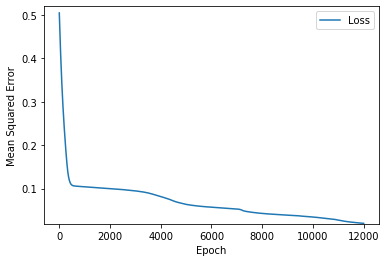

In [377]:
epochs, mse = train_model(my_model, df_training, epochs_ini, 
                          label_name, batch_size)
plot_the_loss_curve(epochs, mse)

In [405]:
#plt.plot(list_epochs,list_error)
#print(list_epochs[list_error.index(min(list_error))])

In [406]:
example_mydata = df_testing.sample(frac=0.8,random_state=20)
example_mydata.head(20)
#run the evaluation
# i checked and they should be correct
example_features = {name:np.array(value) for name, value in example_mydata.items()}
predicted = 2*my_model.predict(example_features)-1
predicted=predicted.reshape(len(predicted))
exact = example_mydata["Energy"].to_numpy()*2-1


1/1 [==============================] - 0s 1ms/step - loss: 0.0104 - mean_squared_error: 0.0104
0.010377072729170322


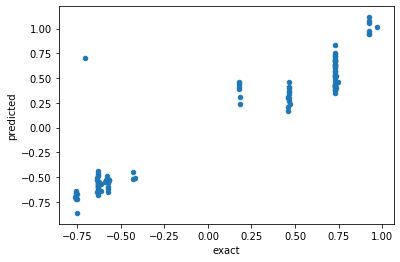

In [407]:
my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)
print(my_model.evaluate(x = test_features, y = test_label, batch_size=batch_size)
[0])

#print(predicted[:])
df_compare=pd.DataFrame({"predicted":predicted, "exact":exact})

#for i in range(100):
#    print(predicted[i][0],exact[i],predicted[i][0]-exact[i])
    
df_compare.plot.scatter(x="exact", y="predicted")

0.0218 for first try

min error at around 10k-12k epochs
-> 0,03


[10,10,5]_12000 => 0,176
[10,10]_12000 => 0,028


In [408]:
df_compare.head(50)
df_compare.to_csv("first_test.csv")

In [396]:
tf.test.is_gpu_available()


False

In [397]:
tf.config.list_physical_devices('GPU')

[]

In [399]:

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  0
